# 이성우 작성

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
# 런타임 다시 시작 후 실행
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
file_path = '/content/drive/MyDrive/codeit_project/p1/서울교통공사_1_8호선 역별 일별 시간대별 승객유형별 승하차인원_20250630.csv'
df_user = pd.read_csv(file_path, encoding='cp949')

## 괄호 제거용 함수 (정규식 사용)

In [6]:
import re

def normalize_station_name(name):
    return re.sub(r'\(.*\)', '', str(name)).strip()

In [7]:
import pandas as pd

df_user['역명'] = df_user['역명'].apply(normalize_station_name)

snames_user_data = df_user['역명'].unique()

snames_user_data.sort()

print(len(snames_user_data), snames_user_data)

243 ['가락시장' '가산디지털단지' '강남' '강남구청' '강동' '강동구청' '강변' '강일' '개롱' '개화산' '거여' '건대입구'
 '경복궁' '경찰병원' '고덕' '고려대' '고속터미널' '공덕' '공릉' '광나루' '광명사거리' '광화문' '광흥창' '교대'
 '구로디지털단지' '구산' '구의' '구파발' '군자' '굽은다리' '금호' '길동' '길음' '김포공항' '까치산' '까치울'
 '낙성대' '남구로' '남부터미널' '남성' '남위례' '남태령' '남한산성입구' '내방' '노원' '녹번' '녹사평' '논현'
 '단대오거리' '답십리' '당고개' '당산' '대림' '대청' '대치' '대흥' '도곡' '도림천' '도봉산' '독립문' '독바위'
 '돌곶이' '동대문' '동대문역사문화공원' '동대입구' '동묘앞' '동작' '둔촌동' '디지털미디어시티' '뚝섬' '마곡' '마들'
 '마장' '마천' '마포' '마포구청' '망원' '매봉' '먹골' '면목' '명동' '명일' '모란' '목동' '몽촌토성'
 '무악재' '문래' '문정' '미사' '미아' '미아사거리' '반포' '발산' '방배' '방이' '방화' '버티고개' '보라매'
 '보문' '복정' '봉천' '봉화산' '불광' '불암산' '사가정' '사당' '산성' '삼각지' '삼성' '상계' '상도' '상봉'
 '상수' '상왕십리' '상월곡' '상일동' '새절' '서대문' '서울대입구' '서울역' '서초' '석계' '석촌' '선릉' '성수'
 '성신여대입구' '송정' '송파' '수락산' '수서' '수유' '수진' '숙대입구' '숭실대입구' '시청' '신금호' '신길'
 '신내' '신답' '신당' '신대방' '신대방삼거리' '신도림' '신림' '신사' '신설동' '신용산' '신정' '신정네거리'
 '신촌' '신풍' '신흥' '쌍문' '아차산' '아현' '안국' '안암' '암사' '암사역사공원' '압구정' '애오개' '약수'
 '양재' '양천구청' '양평' '어린이대공원' '여의나루' '여의도' '

In [8]:
#까치울 배제, 당고개->불암산으로 변경됨, 성수/응암에 통합

rename_map = {
    '성수E': '성수',
    '응암S': '응암',
    '당고개': '불암산'
}

df_user['역명'] = df_user['역명'].apply(normalize_station_name).replace(rename_map)

df_user = df_user[df_user['역명'] != '까치울']
df_user = df_user[df_user['역명'] != '신내']

In [9]:
print(df_user.columns)

Index(['연번', '수송일자', '호선명', '역번호', '역명', '승하차구분', '승객유형', '06시간대이전',
       '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대',
       '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대',
       '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대',
       '24시간대이후'],
      dtype='object')


In [10]:
#이용자수 컬럼명에 승객수를 붙여 가독성 향상
user_time_cols = ['06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
                  '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
                  '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
                  '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후']

In [11]:
rename_user = {col: f"{col}_승객수" for col in user_time_cols}
df_user.rename(columns=rename_user, inplace=True)

In [12]:
#연번으로 인덱스 지정하는 경우 아래 코드 주석 해제
df_user = df_user.set_index('연번')
df_user.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,...,15-16시간대_승객수,16-17시간대_승객수,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수
연번,,,,,,,,,,,,,,,,,,,,,
1,2025-01-01,1호선,150,서울역,승차,일반,338,241,329,564,...,2905,2941,3092,2805,2554,1947,2207,1412,755,25
2,2025-01-01,1호선,150,서울역,승차,어린이,1,0,2,7,...,115,108,87,45,32,22,8,3,5,1
3,2025-01-01,1호선,150,서울역,승차,중고생,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,2025-01-01,1호선,150,서울역,승차,청소년,24,18,8,25,...,113,104,90,71,59,54,42,20,28,0
5,2025-01-01,1호선,150,서울역,승차,우대권,44,58,79,126,...,521,488,410,292,245,173,173,90,29,0


In [13]:
df_user.columns

Index(['수송일자', '호선명', '역번호', '역명', '승하차구분', '승객유형', '06시간대이전_승객수',
       '06-07시간대_승객수', '07-08시간대_승객수', '08-09시간대_승객수', '09-10시간대_승객수',
       '10-11시간대_승객수', '11-12시간대_승객수', '12-13시간대_승객수', '13-14시간대_승객수',
       '14-15시간대_승객수', '15-16시간대_승객수', '16-17시간대_승객수', '17-18시간대_승객수',
       '18-19시간대_승객수', '19-20시간대_승객수', '20-21시간대_승객수', '21-22시간대_승객수',
       '22-23시간대_승객수', '23-24시간대_승객수', '24시간대이후_승객수'],
      dtype='object')

In [14]:
import pandas as pd

# 1. '수송일자' 컬럼을 datetime 형식으로 변환 (이미 변환되어 있다면 생략 가능)
df_user['수송일자'] = pd.to_datetime(df_user['수송일자'])

# 2. 2025년 공휴일 리스트 정의
holidays_2025 = [
    '2025-01-01', '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
    '2025-03-01', '2025-03-03', '2025-05-05', '2025-05-06', '2025-06-03', '2025-06-06'
]
holidays_2025 = pd.to_datetime(holidays_2025)

# 3. 구분 로직 적용
# 요일 확인: dt.weekday (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
is_weekend = df_user['수송일자'].dt.weekday >= 5
is_holiday = df_user['수송일자'].isin(holidays_2025)

# 기본값을 '평일'로 설정 후 주말이거나 공휴일인 경우 '주말+공휴일'로 변경
df_user['구분'] = '평일'
df_user.loc[is_weekend | is_holiday, '구분'] = '주말+공휴일'

# 결과 확인
# print(df_user[['수송일자', '구분']].drop_duplicates())

## 평일/주말+공휴일 데이터 원본 출력

In [15]:
weekday_df = df_user[df_user['구분'] == '평일']
weekend_df = df_user[df_user['구분'] == '주말+공휴일']

weekday_df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,...,16-17시간대_승객수,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수,구분
연번,,,,,,,,,,,,,,,,,,,,,
4449,2025-01-02,1호선,150,서울역,승차,일반,225,805,2921,4326,...,3546,6637,9963,4254,2923,2595,1590,769,88,평일
4450,2025-01-02,1호선,150,서울역,승차,어린이,0,0,3,8,...,20,38,27,20,6,9,3,2,0,평일
4451,2025-01-02,1호선,150,서울역,승차,중고생,0,0,0,0,...,1,1,0,0,0,0,0,0,0,평일
4452,2025-01-02,1호선,150,서울역,승차,청소년,1,7,40,38,...,66,64,58,57,37,22,21,9,0,평일
4453,2025-01-02,1호선,150,서울역,승차,우대권,85,151,287,327,...,814,765,492,300,198,176,80,41,4,평일


In [16]:
weekday_df.to_csv('평일_이용자수_데이터.csv', encoding = 'cp949')
weekend_df.to_csv('주말+공휴일_이용자수_데이터.csv', encoding = 'cp949')

In [17]:
def get_net_inflow_df(target_df):
    """
    입력받은 DF(평일 또는 주말)에 대해 역별 시간대별 순유입 평균 DF를 생성
    """
    time_cols = [col for col in target_df.columns if '승객수' in col]

    # 1. 일자별/호선별/역별/승하차구분별로 승객수 합계 계산 (승객유형 통합)
    daily_combined = target_df.groupby(['수송일자', '호선명', '역명', '승하차구분'])[time_cols].sum().reset_index()

    # 2. 승차와 하차를 컬럼으로 분리 (Pivot)
    # index는 메타데이터, columns는 승하차구분, values는 시간대별 승객수 컬럼들
    pivot_df = daily_combined.pivot_table(
        index=['수송일자', '호선명', '역명'],
        columns='승하차구분',
        values=time_cols
    )

    # 3. 순유입 계산 (승차 - 하차)
    # pivot_df['승객수컬럼']['승차'] - pivot_df['승객수컬럼']['하차']
    net_inflow_daily = pivot_df.xs('승차', axis=1, level=1) - pivot_df.xs('하차', axis=1, level=1)

    # 4. 일자별 순유입의 평균 계산 (최종 결과물)
    # 여기서 '수송일자' 레벨을 제거하고 호선/역별 평균을 구함
    final_mean_df = net_inflow_daily.groupby(['호선명', '역명']).mean().round(2)

    # 5. 컬럼명 변경: '승객수' -> '순유입'
    # 예: '08-09시간대_승객수' -> '08-09시간대_순유입'
    new_col_names = {col: col.replace('승객수', '순유입') for col in final_mean_df.columns if '승객수' in col}
    final_mean_df = final_mean_df.rename(columns=new_col_names)

    return final_mean_df
    return final_mean_df.reset_index()

# 평일과 주말에 대해 각각 실행
weekday_net_inflow = get_net_inflow_df(weekday_df)
weekend_net_inflow = get_net_inflow_df(weekend_df)

# 결과 확인
print("--- 평일 역별 시간대별 평균 순유입 ---")
print(weekday_net_inflow.head())

--- 평일 역별 시간대별 평균 순유입 ---
         06-07시간대_순유입  06시간대이전_순유입  07-08시간대_순유입  08-09시간대_순유입  09-10시간대_순유입  \
호선명 역명                                                                         
1호선 동대문        113.89       391.46        193.42         77.98        -17.92   
    동묘앞        -28.66        78.46        -19.84       -266.56       -107.98   
    서울역      -1089.08        66.34      -1477.79      -5002.03      -2631.32   
    시청        -899.47      -144.19      -3152.51      -9066.92      -3389.24   
    신설동         57.37       273.69       -164.99      -1035.57       -527.89   

         10-11시간대_순유입  11-12시간대_순유입  12-13시간대_순유입  13-14시간대_순유입  14-15시간대_순유입  \
호선명 역명                                                                          
1호선 동대문       -121.70       -155.63          0.16          9.95         94.22   
    동묘앞       -172.40       -282.81       -158.83       -171.70         29.63   
    서울역       -199.80        547.01        695.00        556.24        366.89   
    시청  

In [18]:
import numpy as np

def calculate_station_indices(df_source):
    # 1. 승하차 데이터 분리 (앞서 만든 로직 활용)
    time_cols = [col for col in df_source.columns if '승객수' in col]
    daily_combined = df_source.groupby(['수송일자', '역명', '승하차구분'])[time_cols].sum().reset_index()

    # [호선명, 역명]별로 평균 승차/하차수 계산
    mean_stats = daily_combined.groupby(['역명', '승하차구분'])[time_cols].mean().reset_index()

    # 승차와 하차를 별도 DF로 분리
    on_df = mean_stats[mean_stats['승하차구분'] == '승차'].set_index(['역명'])
    off_df = mean_stats[mean_stats['승하차구분'] == '하차'].set_index(['역명'])

    # 2. 시간대 설정
    morning_rush = [f'{col}' for col in time_cols if any(x in col for x in ['07-08', '08-09', '09-10'])]
    evening_rush = [f'{col}' for col in time_cols if any(x in col for x in ['17-18', '18-19', '19-20'])]

    # 3. 주요 지표 계산
    m_on = on_df[morning_rush].sum(axis=1)
    m_off = off_df[morning_rush].sum(axis=1)
    e_on = on_df[evening_rush].sum(axis=1)
    e_off = off_df[evening_rush].sum(axis=1)

    m_inflow = m_off - m_on
    e_inflow = e_off - e_on

    # 4. 결과 데이터프레임 생성
    res_df = pd.DataFrame(index=on_df.index)
    res_df['출근_승하차비율'] = (m_on / m_off).replace([np.inf, -np.inf], np.nan).round(2)
    res_df['퇴근_승하차비율'] = (e_on / e_off).replace([np.inf, -np.inf], np.nan).round(2)

    res_df['불균형_강도'] = (m_inflow - e_inflow).round(2)
    res_df['불균형_지수'] = (res_df['불균형_강도'].abs() / (m_on + m_off + e_on + e_off)).round(3)

    # 역 성격 지수 및 로그 변환
    res_df['역_성격_지수'] = (res_df['출근_승하차비율'] / res_df['퇴근_승하차비율']).replace([np.inf, -np.inf], np.nan)
    res_df['로그_역성격_지수'] = np.log10(res_df['역_성격_지수']).replace([np.inf, -np.inf], np.nan).round(2)

    return res_df.reset_index()

# 평일과 주말 데이터에 각각 적용
final_weekday_analysis = calculate_station_indices(weekday_df)
final_weekend_analysis = calculate_station_indices(weekend_df)

In [19]:
final_weekday_analysis.head()

,역명,출근_승하차비율,퇴근_승하차비율,불균형_강도,불균형_지수,역_성격_지수,로그_역성격_지수
0,가락시장,0.74,1.06,1756.38,0.088,0.698113,-0.16
1,가산디지털단지,0.09,8.10,57904.87,0.813,0.011111,-1.95
2,강남,0.19,2.02,45606.46,0.497,0.094059,-1.03
3,강남구청,0.10,3.92,15662.08,0.708,0.025510,-1.59
4,강동,1.42,0.81,-3132.08,0.141,1.753086,0.24


## 순유입데이터 파일 출력

In [20]:
final_weekday_analysis.to_csv('평일_순유입_데이터.csv', encoding = 'cp949')
final_weekend_analysis.to_csv('주말+공휴일_순유입_데이터.csv', encoding = 'cp949')

In [21]:
# 1. 매핑 사전 정의
category_map = {
    # 일반 그룹
    '일반': '일반', '영어 일반': '일반', '일어 일반': '일반', '중국어 일반': '일반', '직원': '일반',
    # 미성년자 그룹
    '어린이': '미성년자', '중고생': '미성년자', '청소년': '미성년자',
    '영어 어린이': '미성년자', '일어 어린이': '미성년자', '중국어 어린이': '미성년자',
    # 우대 그룹
    '우대권': '우대'
}

def aggregate_by_age_group(target_df, group_name):
    # 시간대 컬럼 추출
    time_cols = [col for col in target_df.columns if '승객수' in col]

    # 2. 새로운 '연령대그룹' 컬럼 생성
    # 매핑되지 않는 값이 있을 경우를 대비해 '기타'로 처리
    target_df = target_df.copy()
    target_df['연령대그룹'] = target_df['승객유형'].map(category_map).fillna('기타')

    # 3. 일별/역별/연령대그룹별 합계 계산 (호선 통합)
    # 호선이 달라도 역명이 같으면 하나로 합치기 위해 '호선명'을 groupby에서 제외
    age_group_sum = target_df.groupby(['수송일자', '역명', '승하차구분', '연령대그룹'])[time_cols].sum().reset_index()

    return age_group_sum

# 평일과 주말 데이터에 각각 적용
weekday_age_group = aggregate_by_age_group(weekday_df, "평일")
weekend_age_group = aggregate_by_age_group(weekend_df, "주말+공휴일")

# 결과 확인 (예: 평일 데이터)
print(weekday_age_group.head())

        수송일자    역명 승하차구분 연령대그룹  06시간대이전_승객수  06-07시간대_승객수  07-08시간대_승객수  \
0 2025-01-02  가락시장    승차  미성년자            0             1            26   
1 2025-01-02  가락시장    승차    우대           42           100           148   
2 2025-01-02  가락시장    승차    일반          105           329          1038   
3 2025-01-02  가락시장    하차  미성년자            0             0             0   
4 2025-01-02  가락시장    하차    우대           62           157           182   

   08-09시간대_승객수  09-10시간대_승객수  10-11시간대_승객수  ...  15-16시간대_승객수  16-17시간대_승객수  \
0            15             8            11  ...            10            33   
1           181           266           372  ...           494           386   
2          1177           594           377  ...           515           536   
3             7             3             7  ...            26            21   
4           238           286           367  ...           447           398   

   17-18시간대_승객수  18-19시간대_승객수  19-20시간대_승객수  20-21시간대_승객수  21-22시간대_

In [22]:
def aggregate_to_daily_total(age_group_df):
    # 1. 모든 시간대 컬럼(06시 이전 ~ 24시 이후) 합산하여 '일일총승객수' 생성
    time_cols = [col for col in age_group_df.columns if '승객수' in col]
    age_group_df['일일총승객수'] = age_group_df[time_cols].sum(axis=1)

    # 2. 날짜, 승하차구분, 연령대그룹 기준으로 모든 역의 데이터를 합산
    daily_total = age_group_df.groupby(['수송일자', '역명', '승하차구분', '연령대그룹'])['일일총승객수'].sum().reset_index()

    return daily_total

# 평일/주말 데이터에 적용
weekday_daily_total = aggregate_to_daily_total(weekday_age_group)
weekend_daily_total = aggregate_to_daily_total(weekend_age_group)

# 결과 확인
print("--- 평일 연령대별 일일 총 승객수 ---")
print(weekday_daily_total.head(10))

--- 평일 연령대별 일일 총 승객수 ---
        수송일자       역명 승하차구분 연령대그룹  일일총승객수
0 2025-01-02     가락시장    승차  미성년자     265
1 2025-01-02     가락시장    승차    우대    4669
2 2025-01-02     가락시장    승차    일반   12379
3 2025-01-02     가락시장    하차  미성년자     305
4 2025-01-02     가락시장    하차    우대    4750
5 2025-01-02     가락시장    하차    일반   13536
6 2025-01-02  가산디지털단지    승차  미성년자     199
7 2025-01-02  가산디지털단지    승차    우대    3701
8 2025-01-02  가산디지털단지    승차    일반   45482
9 2025-01-02  가산디지털단지    하차  미성년자     184


## 평균 승객수: 역-승하차-연령대그룹

In [23]:
def get_final_avg_stats(daily_df):
    # 1. 수송일자를 그룹에서 제외하고 평균(mean) 계산
    # 각 날짜별로 합산된 '일일총승객수'의 평균을 구합니다.
    final_avg = daily_df.groupby(['역명', '승하차구분', '연령대그룹'])['일일총승객수'].mean().round(2).reset_index()

    # 2. 가독성을 위해 컬럼명 변경
    final_avg = final_avg.rename(columns={'일일총승객수': '평균승객수'})

    return final_avg

# 평일과 주말 데이터에 각각 적용
weekday_final = get_final_avg_stats(weekday_age_group)
weekend_final = get_final_avg_stats(weekend_age_group)

# 결과 확인
print("--- 평일 역별/연령대별 평균 승객수 (Top 5) ---")
print(weekday_final.head())

--- 평일 역별/연령대별 평균 승객수 (Top 5) ---
     역명 승하차구분 연령대그룹     평균승객수
0  가락시장    승차  미성년자    325.47
1  가락시장    승차    우대   5625.55
2  가락시장    승차    일반  13883.55
3  가락시장    하차  미성년자    392.12
4  가락시장    하차    우대   5585.53


r# 연령대그룹 출력

In [24]:
weekday_final.to_csv('평일_연령대그룹.csv', encoding = 'cp949')
weekend_final.to_csv('주말+공휴일_연령대그룹.csv', encoding = 'cp949')

## 1/29

분석한 내용 바탕으로 인사이트 도출해보기

1 순유입데이터를 기반으로 거주그룹/업무그룹으로 나눌 수 있는 지점(threshold) 정의가 필요함

1-1 일단 순유입이라는 것은 무엇인가 -> 코드상에서 정의한 내용은 하차-승차 가 곧 순유입이므로, 순유입이 양수라면 곧 그 지역은 승차가 많다는 것 = 업무그룹일 확률이 높다는 것

1-2 그래서 이 로직을 기반으로 해서 만들어진 변수가 불균형지수, 역성격지수임.
이때 역성격지수는 출근승하차비율/퇴근승하차비율로, 높을 수록 출근 승차자가 많거나 퇴근 하차자가 많은 것을 의미하고, 즉 거주지역일 확률이 높다는 것을 의미함. 불균형지수는 역별 이용자수 유입 - 유출(순유입)을 역별 총 이용자수로 나눈 것으로, 클 수록 역성격의 설명력을 강화함. (모든 변수의 시간대는 지정할 수 있고, 이 코드에서는 오전 7시-10시, 오후 5시-8시를 지정함)

역 성격 지수 (Log 변환 값 기준):

비거주 중심: $<-0.1$

복합/중립: $-0.1 \sim 0.1$

거주 중심: $>0.1$

불균형 지수와 결합:

불균형 지수가 상위 25% (Q3) 기준으로 잡고 분리

근데 봤더니 불균형지수랑 역성격지수는 선형적인 관계가 있음, 즉 두개를 변수로 사용하는건 공선성문제가 있음-> 애초에 우리가 이걸 설정한 이유는 성격이 뚜렷하면서 유동인구수는 적은 알짜역을 파악하는 것이므로, 강도 기준으로 하위%를 매겨서 보는게 낫다고 생각함.



### 최종 전처리 결과물: 순유입데이터, 연령대그룹

In [25]:
weekday_influx = final_weekday_analysis.copy()
weekend_influx = final_weekend_analysis.copy()
weekday_age_group = weekday_final.copy()
weekend_age_group = weekend_final.copy()

In [26]:
weekday_age_group.to_csv('평일연령대.csv', encoding = 'cp949')
weekend_age_group.to_csv('주말연령대.csv', encoding = 'cp949')

In [27]:
def classify_ad_market(df):
    # 1. 역 성격 분류 (로그 값 기준)
    bins = [-np.inf, -0.4, 0.4, np.inf]
    labels = ['비주거', '혼합', '주거']
    df['주거_구분'] = pd.cut(df['로그_역성격_지수'], bins=bins, labels=labels)

    return df

weekday_influx = classify_ad_market(weekday_influx)
weekend_influx = classify_ad_market(weekend_influx)

## 2/3 수정: analyze_targeted_niche 를 분할: 주거구분/시장규모구분으로 분류한 뒤 연령대 그룹을 분류하기


In [28]:
def analyze_targeted_niche(influx_df, age_df):
    # 0. 데이터 통합 (Merge)
    # 연령대 데이터를 피벗하여 각 역별 연령 그룹 합계 및 비중 산출
    age_pivot = age_df.pivot_table(
        index='역명',
        columns='연령대그룹',
        values='평균승객수',
        aggfunc='sum'
    ).fillna(0)

    # 총 이용자수 계산 (미성년자 + 우대 + 일반)
    age_pivot['총_이용자수'] = age_pivot.sum(axis=1)
    # 연령대별 비중 계산
    age_rate = age_pivot.div(age_pivot['총_이용자수'], axis=0).drop(columns=['총_이용자수'])

    # 통합 데이터프레임 생성
    df = influx_df.merge(age_pivot[['총_이용자수']], on='역명')
    df = df.merge(age_rate, on='역명')

    # 1. 시장 규모 및 알짜역 정의 (이용자수 기반)
    # 대형: 상위 20% / 알짜역: 이용자수 하위 60%이면서 (기존: 순도(불균형지수)는 중간 이상, 변경후: 하위 20%~60%)
    q_large = df['총_이용자수'].quantile(0.8)
    q_niche_limit_high = df['총_이용자수'].quantile(0.6)
    q_niche_limit_low = df['총_이용자수'].quantile(0.2)

    df['시장_규모'] = '일반'
    df.loc[df['총_이용자수'] >= q_large, '시장_규모'] = '대형'

    # 알짜역 조건: 이용자수가 적당히 많을 것(20%~60%)
    is_niche_candidate = (df['총_이용자수'] < q_niche_limit_high) & (df['총_이용자수'] > q_niche_limit_low)
    # 여기에 역 성격이 뚜렷한 경우(혼합 제외)를 더해 알짜역 확정
    df.loc[is_niche_candidate & (df['주거_구분'] != '혼합'), '시장_규모'] = '알짜역'

    # 2. 3대 핵심 틈새 그룹 분류
    is_niche = (df['시장_규모'] == '알짜역')
    df['특화_타겟'] = '기타'

    # 오피스 틈새: 업무지구 + 일반인(2065) 비중 상위 30%
    df.loc[is_niche & (df['주거_구분'] == '주거') & (df['일반'] > df['일반'].quantile(0.7)), '특화_타겟'] = '주거_일반_알짜역'
    df.loc[is_niche & (df['주거_구분'] == '비주거') & (df['일반'] > df['일반'].quantile(0.7)), '특화_타겟'] = '비주거_일반_알짜역'
    # 실버 틈새: 주거지구 + 우대 비중 상위 30%
    df.loc[is_niche & (df['주거_구분'] == '주거') & (df['우대'] > df['우대'].quantile(0.7)), '특화_타겟'] = '주거_우대_알짜역'
    df.loc[is_niche & (df['주거_구분'] == '비주거') & (df['우대'] > df['우대'].quantile(0.7)), '특화_타겟'] = '비주거_우대_알짜역'
    # 에듀 틈새: 주거지구 + 미성년자 비중 상위 30%
    df.loc[is_niche & (df['주거_구분'] == '주거') & (df['미성년자'] > df['미성년자'].quantile(0.7)), '특화_타겟'] = '주거_미성년자_알짜역'
    df.loc[is_niche & (df['주거_구분'] == '비주거') & (df['미성년자'] > df['미성년자'].quantile(0.7)), '특화_타겟'] = '비주거_미성년자_알짜역'

    return df

# 평일/주말 각각 실행
weekday_final_report = analyze_targeted_niche(weekday_influx, weekday_age_group)
weekend_final_report = analyze_targeted_niche(weekend_influx, weekend_age_group)

### 주거/업무별 알짜역 출력

In [29]:
weekday_niche_markets = weekday_final_report.copy()
weekend_niche_markets = weekend_final_report.copy()

In [30]:
weekday_niche_markets.to_csv('평일_알짜역_전체역.csv', encoding = 'cp949')
weekend_niche_markets.to_csv('주말+공휴일_알짜역_전체역.csv', encoding = 'cp949')

## 1/30

일반이 너무 광범위함(20~65)-> 시간대별 승하자 인원으로 새로운 기준을 세우고 분류해보자

'알짜역'여부를 판단하는데 있어서 일평균이용자수보다는 기존에 광고사에서 매겨놓은 역 별 등급(=광고단가)이 더 적절하지 않을까? -> 일단 보류, 모든 역에 대해 등급이 매겨져 있는지 파악 필요. 어차피 코드 몇줄 고치기만 하면 되는거라 적용은 어렵지 않음

In [31]:
import pandas as pd
import numpy as np

def add_activity_index(influx_df, df_source):
    # 시간대별 컬럼 정의 (07-08_승객수 등 원천 데이터 컬럼명 기준)
    all_cols = [col for col in df_source.columns if '승객수' in col]
    h11_17 = [col for col in all_cols if any(x in col for x in ['11-12', '12-13', '13-14', '14-15', '15-16', '16-17'])]
    h11_16 = [col for col in all_cols if any(x in col for x in ['11-12', '12-13', '13-14', '14-15', '15-16'])]
    h12_18 = [col for col in all_cols if any(x in col for x in ['12-13', '13-14', '14-15', '15-16', '16-17', '17-18'])]
    h22_24 = [col for col in all_cols if any(x in col for x in ['22-23', '23-24'])]

    # 요일 구분 (평일/휴일)
    df_source['is_holiday'] = pd.to_datetime(df_source['수송일자']).dt.weekday >= 5

    # 기초 집계 (역별/요일별 평균값)
    pivot_base = df_source.groupby(['역명', 'is_holiday', '승하차구분'])[all_cols].mean()

    # 지수 계산을 위한 데이터 프레임 생성
    adv_df = pd.DataFrame(index=influx_df['역명'].unique())

    # 1. 주말 유동성: (휴일 11-17 하차 평균) / (평일 11-17 하차 평균)
    hol_11_17 = pivot_base.loc[(slice(None), True, '하차'), h11_17].sum(axis=1).reset_index(level=[1,2], drop=True)
    wd_11_17 = pivot_base.loc[(slice(None), False, '하차'), h11_17].sum(axis=1).reset_index(level=[1,2], drop=True)
    adv_df['주말_유동성'] = (hol_11_17 / wd_11_17).replace([np.inf, -np.inf], 0).round(2)

    # 2. 심야 활동성: (평일 22-24 승차 합) / (평일 일일 전체 승차 합)
    wd_on_22_24 = pivot_base.loc[(slice(None), False, '승차'), h22_24].sum(axis=1).reset_index(level=[1,2], drop=True)
    wd_on_total = pivot_base.loc[(slice(None), False, '승차'), all_cols].sum(axis=1).reset_index(level=[1,2], drop=True)
    adv_df['심야_활동성'] = (wd_on_22_24 / wd_on_total).round(3)

    # 3. 낮 시간 활동 지수: (평일 11-16 하차 합) / (평일 일일 총 하차)
    wd_off_11_16 = pivot_base.loc[(slice(None), False, '하차'), h11_16].sum(axis=1).reset_index(level=[1,2], drop=True)
    wd_off_total = pivot_base.loc[(slice(None), False, '하차'), all_cols].sum(axis=1).reset_index(level=[1,2], drop=True)
    adv_df['낮_활동_지수'] = (wd_off_11_16 / wd_off_total).round(3)

    # 4. 휴일 오후 나들이: (휴일 12-18 하차 합) / (휴일 일일 총 하차)
    hol_off_12_18 = pivot_base.loc[(slice(None), True, '하차'), h12_18].sum(axis=1).reset_index(level=[1,2], drop=True)
    hol_off_total = pivot_base.loc[(slice(None), True, '하차'), all_cols].sum(axis=1).reset_index(level=[1,2], drop=True)
    adv_df['휴일_나들이_지수'] = (hol_off_12_18 / hol_off_total).round(3)

    # 기존 influx 데이터와 병합
    return influx_df.merge(adv_df.reset_index().rename(columns={'index':'역명'}), on='역명', how='left')

# 데이터 적용
weekday_niche_markets_with_activity_index = add_activity_index(weekday_niche_markets, df_user)
weekend_niche_markets_with_activity_index = add_activity_index(weekend_niche_markets, df_user)

In [32]:
weekday_niche_markets_with_activity_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   역명         240 non-null    object  
 1   출근_승하차비율   240 non-null    float64 
 2   퇴근_승하차비율   240 non-null    float64 
 3   불균형_강도     240 non-null    float64 
 4   불균형_지수     240 non-null    float64 
 5   역_성격_지수    240 non-null    float64 
 6   로그_역성격_지수  240 non-null    float64 
 7   주거_구분      240 non-null    category
 8   총_이용자수     240 non-null    float64 
 9   미성년자       240 non-null    float64 
 10  우대         240 non-null    float64 
 11  일반         240 non-null    float64 
 12  시장_규모      240 non-null    object  
 13  특화_타겟      240 non-null    object  
 14  주말_유동성     240 non-null    float64 
 15  심야_활동성     240 non-null    float64 
 16  낮_활동_지수    240 non-null    float64 
 17  휴일_나들이_지수  240 non-null    float64 
dtypes: category(1), float64(14), object(3)
memory usage: 32.4+ KB


In [33]:
#활동성 지수 추가
def assign_persona_segments(df):
    # 지표별 기준점 설정, 기준값들은 유동적으로 조정 가능 (현재는 상위 30%를 '높음', 하위 30%를 '낮음'으로 간주)
    h_night, l_night = df['심야_활동성'].quantile(0.7), df['심야_활동성'].quantile(0.3)
    h_day, l_day = df['낮_활동_지수'].quantile(0.7), df['낮_활동_지수'].quantile(0.3)
    h_weekend, l_weekend = df['주말_유동성'].quantile(0.7), df['주말_유동성'].quantile(0.3)
    h_outing = df['휴일_나들이_지수'].quantile(0.7)

    # 새로운 컬럼 초기화
    df['페르소나_구분'] = '기타'

    # A. 번화가: 심야 활동성(↑) + 낮 활동성(↓)
    cond_night_life = (df['심야_활동성'] > h_night) & (df['낮_활동_지수'] < l_day)
    df.loc[cond_night_life, '페르소나_구분'] = '번화가'

    # B. 생활 밀착 상권: 낮 활동성(↑) + 주말 유동성(↓)
    cond_local_life = (df['낮_활동_지수'] > h_day) & (df['주말_유동성'] < l_weekend)
    df.loc[cond_local_life, '페르소나_구분'] = '생활_밀착_상권'

    # C. 핫플레이스: 주말 유동성(↑) + 나들이 지수(↑)
    cond_hot_place = (df['주말_유동성'] > h_weekend) & (df['휴일_나들이_지수'] > h_outing)
    df.loc[cond_hot_place, '페르소나_구분'] = '핫플레이스'

    # D. 순수 주거/오피스: 심야 활동성(↓) + 낮 활동성(↓)
    cond_pure_stay = (df['심야_활동성'] < l_night) & (df['낮_활동_지수'] < l_day)
    df.loc[cond_pure_stay, '페르소나_구분'] = '순수_주거지'

    return df

### 페르소나 마스터테이블 작성

In [34]:
# 240개역에 페르소나 부여한 마스터 테이블 생성
all_stations_base = pd.DataFrame({'역명': df_user['역명'].unique()})

df_master_activity = add_activity_index(all_stations_base, df_user)

df_master_activity = assign_persona_segments(df_master_activity)

# 전체 역에 대해 지표와 페르소나가 잘 붙었는지 점검
display(df_master_activity.head())

,역명,주말_유동성,심야_활동성,낮_활동_지수,휴일_나들이_지수,페르소나_구분
0,서울역,1.23,0.046,0.229,0.446,기타
1,시청,1.49,0.050,0.181,0.538,핫플레이스
2,종각,1.30,0.075,0.190,0.536,핫플레이스
3,종로3가,1.21,0.084,0.347,0.557,핫플레이스
4,종로5가,1.06,0.036,0.348,0.545,핫플레이스


In [35]:
weekday_niche_markets_with_activity_index = assign_persona_segments(weekday_niche_markets_with_activity_index)
weekend_niche_markets_with_activity_index = assign_persona_segments(weekend_niche_markets_with_activity_index)

In [36]:
weekday_niche_markets_with_activity_index.head()

,역명,출근_승하차비율,퇴근_승하차비율,불균형_강도,불균형_지수,역_성격_지수,로그_역성격_지수,주거_구분,총_이용자수,미성년자,우대,일반,시장_규모,특화_타겟,주말_유동성,심야_활동성,낮_활동_지수,휴일_나들이_지수,페르소나_구분
0,가락시장,0.74,1.06,1756.38,0.088,0.698113,-0.16,혼합,40367.12,0.017777,0.277728,0.704495,일반,기타,0.91,0.044,0.222,0.456,기타
1,가산디지털단지,0.09,8.10,57904.87,0.813,0.011111,-1.95,비주거,102473.57,0.004607,0.077784,0.917608,대형,기타,0.87,0.034,0.116,0.470,기타
2,강남,0.19,2.02,45606.46,0.497,0.094059,-1.03,비주거,179714.81,0.022529,0.069188,0.908283,대형,기타,1.03,0.098,0.207,0.463,기타
3,강남구청,0.10,3.92,15662.08,0.708,0.025510,-1.59,비주거,38743.06,0.011809,0.110594,0.877598,일반,기타,1.02,0.066,0.184,0.418,번화가
4,강동,1.42,0.81,-3132.08,0.141,1.753086,0.24,혼합,41674.03,0.017954,0.209534,0.772512,일반,기타,0.97,0.025,0.193,0.422,기타


In [37]:
wd = weekday_niche_markets_with_activity_index.sort_values(by='특화_타겟')
we = weekend_niche_markets_with_activity_index.sort_values(by='특화_타겟')

In [38]:
print(wd.shape, we.shape)

(240, 19) (240, 19)


### 페르소나 반영한 분석결과 출력

In [39]:
wd.to_csv('평일_0130수정_전체역.csv', encoding = 'cp949')
we.to_csv('주말_0130수정_전체역.csv', encoding = 'cp949')

In [40]:
file_path = '/content/drive/MyDrive/codeit_project/p1/역별_광고비_등급_확인용.csv'
df_grades = pd.read_csv(file_path, encoding='utf-8')

In [41]:
wd.head()

,역명,출근_승하차비율,퇴근_승하차비율,불균형_강도,불균형_지수,역_성격_지수,로그_역성격_지수,주거_구분,총_이용자수,미성년자,우대,일반,시장_규모,특화_타겟,주말_유동성,심야_활동성,낮_활동_지수,휴일_나들이_지수,페르소나_구분
0,가락시장,0.74,1.06,1756.38,0.088,0.698113,-0.16,혼합,40367.12,0.017777,0.277728,0.704495,일반,기타,0.91,0.044,0.222,0.456,기타
141,신사,0.15,2.20,17226.12,0.537,0.068182,-1.17,비주거,62116.98,0.018820,0.084779,0.896401,대형,기타,1.06,0.084,0.234,0.473,핫플레이스
142,신설동,0.66,1.50,3969.09,0.202,0.440000,-0.36,혼합,38802.67,0.014421,0.264111,0.721469,일반,기타,1.21,0.029,0.228,0.430,기타
143,신용산,0.20,1.92,11844.82,0.472,0.104167,-0.98,비주거,46305.55,0.015811,0.097361,0.886828,일반,기타,1.36,0.071,0.224,0.545,핫플레이스
144,신정,6.12,0.33,-9427.41,0.629,18.545455,1.27,주거,27397.51,0.030017,0.181595,0.788388,알짜역,기타,0.89,0.015,0.175,0.399,순수_주거지


In [42]:
df_grades = df_grades[['역명','등급']]
df_grades

,역명,등급
0,강남,SSA
1,건대입구,SSA
2,고속터미널,SSA
3,광화문,SSA
4,교대,SSA
...,...,...
193,화곡,A
194,화랑대,A
195,효창공원앞,A
196,석계,C


In [43]:
def merge_station_grades(report_df, grades_df):
    merged_df = report_df.merge(grades_df, on='역명', how='left')
    merged_df['등급'] = merged_df['등급'].fillna('없음')

    return merged_df

wd = merge_station_grades(wd, df_grades).sort_values(by='특화_타겟')
we = merge_station_grades(we, df_grades).sort_values(by='특화_타겟')

In [44]:
wd.to_csv('평일_0130수정_등급추가_전체역.csv', encoding = 'cp949')
we.to_csv('주말_0130수정_등급추가_전체역.csv', encoding = 'cp949')

In [45]:
wd_crop = wd[(wd['특화_타겟']!='기타')&(wd['페르소나_구분']!='기타')]
we_crop = we[(we['특화_타겟']!='기타')&(we['페르소나_구분']!='기타')]

In [46]:
wd_crop.to_csv('평일_0130수정_등급추가.csv', encoding = 'cp949')
we_crop.to_csv('주말_0130수정_등급추가.csv', encoding = 'cp949')

## 2/2

평일_0130수정_등급추가_전체역.csv, 주말_0130수정_등급추가_전체역.csv 활용하여 시각화 방안 구색

개인적인 아이디어는
1. 탐색된 알짜역 비중으로 파이차트 만들기
2. 탐색된 알짜역들 좌표로 단계구분도 만들기

일단 2가 좀더 의미 있을듯..

In [47]:
print(wd.shape, we.shape)

(240, 20) (240, 20)


In [48]:
coordinates = pd.read_json('/content/drive/MyDrive/codeit_project/p1/coordinates.json', encoding = 'utf-8')

In [49]:
# json 파일 읽고 전처리
co = coordinates.T
co.index.name = '역명'
co = co.reset_index()


In [50]:
#정규화
co['역명'] = co['역명'].apply(normalize_station_name)

rename_dic = {
    0: '위도',
    1: '경도'
}

co = co.rename(columns=rename_dic)

co

,역명,위도,경도
0,가락시장,37.492522,127.118234
1,종로3가,37.571607,126.991806
2,오금,37.502162,127.128111
3,동대문,37.571420,127.009745
4,동대문역사문화공원,37.565138,127.007896
...,...,...,...
584,동백,37.269043,127.152716
585,초당,37.260752,127.159443
586,삼가,37.242115,127.168075
587,시청·용인대,37.239151,127.178406


In [51]:
#경의중앙선 삭제
duplicates = co[co['역명'].duplicated(keep=False)]
print(duplicates)

co = co.drop([210, 213, 214])

     역명         위도          경도
6    서울  37.554648  126.972559
143  신촌  37.555134  126.936893
210  양평  37.492832  127.491814
213  서울  37.556328  126.969522
214  신촌  37.559783  126.942319
383  양평  37.525648  126.885778


In [52]:
#삭제 확인
duplicates = co[co['역명'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [역명, 위도, 경도]
Index: []


In [53]:
coordinates_unique_station_name = set(co['역명'])
len(coordinates_unique_station_name)

586

In [54]:
#'역'을 삭제 ex)서울역 -> 서울
import re

def remove_station_suffix(name):
    return re.sub(r'(.+)역$', r'\1', name)

wd['역명'] = wd['역명'].apply(remove_station_suffix)
we['역명'] = we['역명'].apply(remove_station_suffix)

In [55]:
wd_coord_merged = pd.merge(wd, co[['역명', '위도', '경도']], on='역명', how='left')
we_coord_merged = pd.merge(we, co[['역명', '위도', '경도']], on='역명', how='left')

print(we.head())

       역명  출근_승하차비율  퇴근_승하차비율   불균형_강도  불균형_지수   역_성격_지수  로그_역성격_지수 주거_구분  \
0    가락시장      1.12      0.79  -650.68   0.092  1.417722       0.15    혼합   
128   동묘앞      0.66      1.83  2654.26   0.262  0.360656      -0.44   비주거   
129    교대      0.54      1.23  2445.06   0.175  0.439024      -0.36    혼합   
130   둔촌동      1.43      0.74  -853.13   0.160  1.932432       0.29    혼합   
131   고려대      1.44      0.85  -417.02   0.122  1.694118       0.23    혼합   

       총_이용자수      미성년자        우대        일반 시장_규모 특화_타겟  주말_유동성  심야_활동성  \
0    22285.22  0.029997  0.340037  0.629966    일반    기타    0.91   0.044   
128  43617.65  0.037512  0.436925  0.525563    대형    기타    1.64   0.028   
129  42956.23  0.045022  0.188010  0.766968    대형    기타    0.64   0.063   
130  16222.66  0.058336  0.291418  0.650245    일반    기타    0.97   0.028   
131  10892.88  0.034503  0.173612  0.791885    일반    기타    0.87   0.047   

     낮_활동_지수  휴일_나들이_지수   페르소나_구분   등급  
0      0.222      0.456        기타    A  
128 

### 위경도 누락된 역들 위경도 추가

In [56]:
missing_coords = we_coord_merged[we_coord_merged['위도'].isnull()]
stations_missing_coords = missing_coords['역명'].unique()
cond_missing = we_coord_merged['역명'].isin(stations_missing_coords)
print(we_coord_merged[cond_missing])

         역명  출근_승하차비율  퇴근_승하차비율   불균형_강도  불균형_지수   역_성격_지수  로그_역성격_지수 주거_구분  \
49      남위례      1.27      0.74  -388.15   0.137  1.716216       0.23    혼합   
65       강일      2.93      0.50 -1038.24   0.405  5.860000       0.77    주거   
66       미사      1.58      0.64 -1893.56   0.219  2.468750       0.39    혼합   
101      자양      1.07      0.87  -373.19   0.057  1.229885       0.09    혼합   
136  암사역사공원      2.74      0.61  -782.68   0.335  4.491803       0.65    주거   
156   하남검단산      1.11      1.06   -18.27   0.005  1.047170       0.02    혼합   
172      이수      1.12      0.88  -429.84   0.062  1.272727       0.10    혼합   
196    하남풍산      0.92      0.83   -66.98   0.033  1.108434       0.04    혼합   
218    하남시청      2.25      0.69 -1080.15   0.270  3.260870       0.51    주거   
233     불암산      1.72      0.66 -1115.13   0.233  2.606061       0.42    주거   

       총_이용자수      미성년자  ...  시장_규모        특화_타겟 주말_유동성 심야_활동성  낮_활동_지수  \
49    9099.59  0.070246  ...     일반           기타   1.03

In [57]:
#약식으로 결측치 채워넣음
#출처: https://data.seoul.go.kr/dataList/OA-21232/S/1/datasetView.do

data = {
    '역명': ['암사역사공원', '하남시청', '강일', '불암산', '자양', '하남검단산', '하남풍산', '미사', '남위례'],
    '위도': [37.55695, 37.54205, 37.55749, 37.670272, 37.53, 37.53972, 37.552034, 37.560927, 37.4624],
    '경도': [127.13702, 127.20612, 127.17593, 127.079066, 127.06, 127.22345, 127.203864, 127.193877, 127.13977]
}

addings = pd.DataFrame(data)

# 3. 결과 확인
print(addings)

       역명         위도          경도
0  암사역사공원  37.556950  127.137020
1    하남시청  37.542050  127.206120
2      강일  37.557490  127.175930
3     불암산  37.670272  127.079066
4      자양  37.530000  127.060000
5   하남검단산  37.539720  127.223450
6    하남풍산  37.552034  127.203864
7      미사  37.560927  127.193877
8     남위례  37.462400  127.139770


In [58]:
co = pd.concat([co, addings], ignore_index=True)

co = co.drop_duplicates(subset=['역명'], keep='last')

we_coord_merged = pd.merge(we, co[['역명', '위도', '경도']], on='역명', how='left')
wd_coord_merged = pd.merge(wd, co[['역명', '위도', '경도']], on='역명', how='left')

In [59]:
missing_coords = we_coord_merged[we_coord_merged['위도'].isnull()]
stations_missing_coords = missing_coords['역명'].unique()
cond_missing = we_coord_merged['역명'].isin(stations_missing_coords)
print(we_coord_merged[cond_missing])

     역명  출근_승하차비율  퇴근_승하차비율  불균형_강도  불균형_지수   역_성격_지수  로그_역성격_지수 주거_구분  \
172  이수      1.12      0.88 -429.84   0.062  1.272727        0.1    혼합   

       총_이용자수      미성년자  ...  시장_규모  특화_타겟 주말_유동성 심야_활동성  낮_활동_지수  휴일_나들이_지수  \
172  22528.91  0.036727  ...     일반     기타   1.07  0.071    0.214      0.464   

     페르소나_구분  등급  위도  경도  
172    핫플레이스  SA NaN NaN  

[1 rows x 22 columns]


### 출력

In [60]:
wd_coord_merged.to_csv('평일_0202수정_전체역.csv', encoding = 'cp949')
we_coord_merged.to_csv('주말_0202수정_전체역.csv', encoding = 'cp949')

In [61]:
wd_coord_merged_spec = wd_coord_merged[(wd_coord_merged['특화_타겟']!='기타')&(wd_coord_merged['페르소나_구분']!='기타')]
we_coord_merged_spec = we_coord_merged[(we_coord_merged['특화_타겟']!='기타')&(we_coord_merged['페르소나_구분']!='기타')]

In [62]:
wd_coord_merged_spec.to_csv('평일_0202수정.csv', encoding = 'cp949')
we_coord_merged_spec.to_csv('주말+공휴일_0202수정.csv', encoding = 'cp949')

In [63]:
wd_coord_merged_spec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 193 to 236
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   역명         19 non-null     object  
 1   출근_승하차비율   19 non-null     float64 
 2   퇴근_승하차비율   19 non-null     float64 
 3   불균형_강도     19 non-null     float64 
 4   불균형_지수     19 non-null     float64 
 5   역_성격_지수    19 non-null     float64 
 6   로그_역성격_지수  19 non-null     float64 
 7   주거_구분      19 non-null     category
 8   총_이용자수     19 non-null     float64 
 9   미성년자       19 non-null     float64 
 10  우대         19 non-null     float64 
 11  일반         19 non-null     float64 
 12  시장_규모      19 non-null     object  
 13  특화_타겟      19 non-null     object  
 14  주말_유동성     19 non-null     float64 
 15  심야_활동성     19 non-null     float64 
 16  낮_활동_지수    19 non-null     float64 
 17  휴일_나들이_지수  19 non-null     float64 
 18  페르소나_구분    19 non-null     object  
 19  등급         19 non-null     object

In [64]:
# 평일

import folium
from folium.plugins import BeautifyIcon

# 1. 페르소나별 색상 매핑
color_dict = {
    '순수_주거지': 'green',
    '생활_밀착_상권': 'orange',
    '핫플레이스': 'purple',
    '번화가': 'red'
}

m = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='CartoDB positron')

# 2. 이용자수 크기 정규화를 위한 값 추출
max_users = wd_coord_merged_spec['총_이용자수'].max()
min_users = wd_coord_merged_spec['총_이용자수'].min()

for i, row in wd_coord_merged_spec.iterrows():
    main_color = color_dict.get(row['페르소나_구분'], 'gray')

    # [크기] 이용자수에 비례 (반지름 5~25 사이)
    radius_size = ((row['총_이용자수'] - min_users) / (max_users - min_users)) * 20 + 5

    popup_info = f"""
    <b>역명:</b> {row['역명']}<br>
    <b>타겟:</b> {row['특화_타겟']}<br>
    <b>페르소나:</b> {row['페르소나_구분']}<br>
    <b>이용자수:</b> {int(row['총_이용자수']):,}명
    """

    # [모양] 특화_타겟에 따른 세 가지 분기
    target = row['특화_타겟']

    if '일반' in target:
        # 1. 일반 타겟 -> 원형
        folium.CircleMarker(
            location=[row['위도'], row['경도']],
            radius=radius_size,
            color=main_color,
            fill=True,
            fill_color=main_color,
            fill_opacity=0.6,
            popup=folium.Popup(popup_info, max_width=300)
        ).add_to(m)

    elif '미성년자' in target:
        # 2. 미성년자 타겟 -> 삼각형
        folium.RegularPolygonMarker(
            location=[row['위도'], row['경도']],
            number_of_sides=3,
            radius=radius_size,
            color=main_color,
            fill=True,
            fill_color=main_color,
            fill_opacity=0.7,
            popup=folium.Popup(popup_info, max_width=300)
        ).add_to(m)

    elif '우대' in target:
        # 3. 우대(어르신 등) 타겟 -> 사각형
        folium.RegularPolygonMarker(
            location=[row['위도'], row['경도']],
            number_of_sides=4,
            radius=radius_size,
            color=main_color,
            fill=True,
            fill_color=main_color,
            fill_opacity=0.7,
            popup=folium.Popup(popup_info, max_width=300)
        ).add_to(m)

m

## 파이썬으로는 시각화에 한계가 있어서 태블로로 전환하였습니다.

## 2/3 수정: analyze_targeted_niche 를 분할: 주거구분/시장규모구분으로 분류한 뒤 연령대 그룹을 분류하기

In [65]:
weekday_influx = final_weekday_analysis.copy()
weekend_influx = final_weekend_analysis.copy()
weekday_age_group = weekday_final.copy()
weekend_age_group = weekend_final.copy()

In [66]:
def classify_land_use(df):
    # 1. 역 성격 분류 (로그 값 기준)
    bins = [-np.inf, -0.4, 0.4, np.inf]
    labels = ['비주거', '혼합', '주거']
    df['주거_구분'] = pd.cut(df['로그_역성격_지수'], bins=bins, labels=labels)

    return df

In [67]:
weekday_influx = classify_land_use(weekday_influx)
weekend_influx = classify_land_use(weekend_influx)

In [110]:
weekday_influx.to_csv('평일임시.csv', encoding = 'cp949')
weekend_influx.to_csv('주말임시.csv', encoding = 'cp949')

In [68]:
#순유입 데이터와 연령대그룹 데이터 결합
def merge_influx_age(influx_df, age_df):
    age_pivot = age_df.pivot_table(
        index='역명', columns='연령대그룹', values='평균승객수', aggfunc='sum'
    ).fillna(0)
    age_pivot['총_이용자수'] = age_pivot.sum(axis=1)
    age_rate = age_pivot.div(age_pivot['총_이용자수'], axis=0).drop(columns=['총_이용자수'])

    df = influx_df.merge(age_pivot[['총_이용자수']], on='역명')
    df = df.merge(age_rate, on='역명')

    return df

In [69]:
#시장 규모 및 알짜역 정의
def classify_market_scale(df):
    q_large = df['총_이용자수'].quantile(0.8)
    q_high = df['총_이용자수'].quantile(0.6)
    q_low = df['총_이용자수'].quantile(0.2)

    df['시장_규모'] = '일반'

    # 대형역 분류
    df.loc[df['총_이용자수'] >= q_large, '시장_규모'] = '대형'

    # 알짜역 분류 (하위 20%~60% 구간)
    is_niche_range = (df['총_이용자수'] < q_high) & (df['총_이용자수'] > q_low)
    df.loc[is_niche_range & (df['주거_구분'] != '혼합'), '시장_규모'] = '알짜역'

    return df

In [70]:
weekday_df = merge_influx_age(weekday_influx, weekday_age_group)
weekday_df = classify_market_scale(weekday_df)

weekend_df = merge_influx_age(weekend_influx, weekend_age_group)
weekend_df = classify_market_scale(weekend_df)

In [71]:
def extract_age_target_dataframes(df):
    # 전체 역(df)을 기준으로 상위 30% 임계치 계산
    q_edu = df['미성년자'].quantile(0.7)
    q_silver = df['우대'].quantile(0.7)
    q_general = df['일반'].quantile(0.7)

    # 전체 기준 상위 30%에 해당하면서 + 알짜역인 데이터 추출
    edu_df = df[df['미성년자'] > q_edu].sort_values(by='미성년자', ascending=False)
    silver_df = df[df['우대'] > q_silver].sort_values(by='우대', ascending=False)
    general_df = df[df['일반'] > q_general].sort_values(by='일반', ascending=False)

    return edu_df, silver_df, general_df

In [72]:
weekday_edu_df, weekday_silver_df, weekday_general_df = extract_age_target_dataframes(weekday_df)
weekend_edu_df, weekend_silver_df, weekend_general_df = extract_age_target_dataframes(weekend_df)

### 6개 데이터프레임 출력

In [73]:
weekday_edu_df.to_csv('평일_미성년자상위30%_알짜역_전체역.csv', encoding = 'cp949')
weekday_silver_df.to_csv('평일_우대상위30%_알짜역_전체역.csv', encoding = 'cp949')
weekday_general_df.to_csv('평일_일반상위30%_알짜역_전체역.csv', encoding = 'cp949')
weekend_edu_df.to_csv('주말_미성년자30%_알짜역_전체역.csv', encoding = 'cp949')
weekend_silver_df.to_csv('주말_우대상위30%_알짜역_전체역.csv', encoding = 'cp949')
weekend_general_df.to_csv('주말_일반상위30%_알짜역_전체역.csv', encoding = 'cp949')

In [74]:
# 필요한 데이터 다시 로드, 여기서 로드할 경우 가공처리는 다시 해야됨
#file_path = '/content/drive/MyDrive/codeit_project/p1/서울교통공사_1_8호선 역별 일별 시간대별 승객유형별 승하차인원_20250630.csv'
#df_user

#file_path = '/content/drive/MyDrive/codeit_project/p1/역별_광고비_등급_확인용.csv'
#df_grades

In [75]:
#페르소나 마스터테이블 사용
cols_to_merge = ['역명', '주말_유동성', '심야_활동성', '낮_활동_지수', '휴일_나들이_지수', '페르소나_구분']
master_sub = df_master_activity[cols_to_merge]

weekday_edu_df = pd.merge(weekday_edu_df, master_sub, on='역명', how='left')
weekday_silver_df = pd.merge(weekday_silver_df, master_sub, on='역명', how='left')
weekday_general_df = pd.merge(weekday_general_df, master_sub, on='역명', how='left')

weekend_edu_df = pd.merge(weekend_edu_df, master_sub, on='역명', how='left')
weekend_silver_df = pd.merge(weekend_silver_df, master_sub, on='역명', how='left')
weekend_general_df = pd.merge(weekend_general_df, master_sub, on='역명', how='left')

In [76]:
weekday_edu_df.head()

,역명,출근_승하차비율,퇴근_승하차비율,불균형_강도,불균형_지수,역_성격_지수,로그_역성격_지수,주거_구분,총_이용자수,미성년자,우대,일반,시장_규모,주말_유동성,심야_활동성,낮_활동_지수,휴일_나들이_지수,페르소나_구분
0,대치,1.25,0.80,-1457.63,0.111,1.562500,0.19,혼합,27810.05,0.134913,0.201735,0.663352,일반,0.83,0.113,0.246,0.466,생활_밀착_상권
1,방이,1.15,0.74,-930.15,0.111,1.554054,0.19,혼합,16837.93,0.084824,0.240370,0.674806,일반,0.92,0.067,0.227,0.446,기타
2,고덕,1.25,0.77,-1321.07,0.121,1.623377,0.21,혼합,23688.17,0.080737,0.275729,0.643534,일반,0.77,0.039,0.242,0.426,생활_밀착_상권
3,종합운동장,1.07,0.29,-4985.68,0.366,3.689655,0.57,주거,28525.43,0.077786,0.140753,0.781461,알짜역,2.94,0.088,0.173,0.677,핫플레이스
4,우장산,2.87,0.41,-7408.11,0.453,7.000000,0.85,주거,33334.72,0.070163,0.240430,0.689407,알짜역,0.80,0.021,0.217,0.429,기타


In [77]:
#등급 정보 추가
weekday_edu_df = merge_station_grades(weekday_edu_df, df_grades)
weekday_silver_df = merge_station_grades(weekday_silver_df, df_grades)
weekday_general_df = merge_station_grades(weekday_general_df, df_grades)
weekend_edu_df = merge_station_grades(weekend_edu_df, df_grades)
weekend_silver_df = merge_station_grades(weekend_silver_df, df_grades)
weekend_general_df = merge_station_grades(weekend_general_df, df_grades)

In [78]:
#결과 확인
weekday_general_df.shape

(72, 19)

In [79]:
# 위경도 정보 추가

# --- 평일 그룹 처리 ---
# 1. 에듀
weekday_edu_df['역명'] = weekday_edu_df['역명'].apply(remove_station_suffix)
weekday_edu_df = pd.merge(weekday_edu_df, co[['역명', '위도', '경도']], on='역명', how='left')

# 2. 실버
weekday_silver_df['역명'] = weekday_silver_df['역명'].apply(remove_station_suffix)
weekday_silver_df = pd.merge(weekday_silver_df, co[['역명', '위도', '경도']], on='역명', how='left')

# 3. 일반
weekday_general_df['역명'] = weekday_general_df['역명'].apply(remove_station_suffix)
weekday_general_df = pd.merge(weekday_general_df, co[['역명', '위도', '경도']], on='역명', how='left')

# --- 주말 그룹 처리 ---
# 4. 에듀
weekend_edu_df['역명'] = weekend_edu_df['역명'].apply(remove_station_suffix)
weekend_edu_df = pd.merge(weekend_edu_df, co[['역명', '위도', '경도']], on='역명', how='left')

# 5. 실버
weekend_silver_df['역명'] = weekend_silver_df['역명'].apply(remove_station_suffix)
weekend_silver_df = pd.merge(weekend_silver_df, co[['역명', '위도', '경도']], on='역명', how='left')

# 6. 일반
weekend_general_df['역명'] = weekend_general_df['역명'].apply(remove_station_suffix)
weekend_general_df = pd.merge(weekend_general_df, co[['역명', '위도', '경도']], on='역명', how='left')

In [80]:
missing_coords = weekday_edu_df[weekday_edu_df['위도'].isnull()]
stations_missing_coords = missing_coords['역명'].unique()
cond_missing = weekday_edu_df['역명'].isin(stations_missing_coords)
print(weekday_edu_df[cond_missing])

Empty DataFrame
Columns: [역명, 출근_승하차비율, 퇴근_승하차비율, 불균형_강도, 불균형_지수, 역_성격_지수, 로그_역성격_지수, 주거_구분, 총_이용자수, 미성년자, 우대, 일반, 시장_규모, 주말_유동성, 심야_활동성, 낮_활동_지수, 휴일_나들이_지수, 페르소나_구분, 등급, 위도, 경도]
Index: []

[0 rows x 21 columns]


In [81]:
weekday_edu_df.head()

,역명,출근_승하차비율,퇴근_승하차비율,불균형_강도,불균형_지수,역_성격_지수,로그_역성격_지수,주거_구분,총_이용자수,미성년자,...,일반,시장_규모,주말_유동성,심야_활동성,낮_활동_지수,휴일_나들이_지수,페르소나_구분,등급,위도,경도
0,대치,1.25,0.80,-1457.63,0.111,1.562500,0.19,혼합,27810.05,0.134913,...,0.663352,일반,0.83,0.113,0.246,0.466,생활_밀착_상권,A,37.494612,127.063642
1,방이,1.15,0.74,-930.15,0.111,1.554054,0.19,혼합,16837.93,0.084824,...,0.674806,일반,0.92,0.067,0.227,0.446,기타,A,37.508857,127.126133
2,고덕,1.25,0.77,-1321.07,0.121,1.623377,0.21,혼합,23688.17,0.080737,...,0.643534,일반,0.77,0.039,0.242,0.426,생활_밀착_상권,A,37.555004,127.154151
3,종합운동장,1.07,0.29,-4985.68,0.366,3.689655,0.57,주거,28525.43,0.077786,...,0.781461,알짜역,2.94,0.088,0.173,0.677,핫플레이스,없음,37.510997,127.073642
4,우장산,2.87,0.41,-7408.11,0.453,7.000000,0.85,주거,33334.72,0.070163,...,0.689407,알짜역,0.80,0.021,0.217,0.429,기타,A,37.548768,126.836318


## 최종 데이터 출력

In [82]:
# 1. 평일_에듀 (weekday_edu_df)
weekday_edu_df.to_csv('평일_에듀_전체.csv', encoding='cp949', index=False)
wd_edu_spec = weekday_edu_df[(weekday_edu_df['시장_규모'] == '알짜역') & (weekday_edu_df['페르소나_구분'] != '기타')]
wd_edu_spec.to_csv('평일_에듀_필터링.csv', encoding='cp949', index=False)

# 2. 평일_실버 (weekday_silver_df)
weekday_silver_df.to_csv('평일_실버_전체.csv', encoding='cp949', index=False)
wd_slv_spec = weekday_silver_df[(weekday_silver_df['시장_규모'] == '알짜역') & (weekday_silver_df['페르소나_구분'] != '기타')]
wd_slv_spec.to_csv('평일_실버_필터링.csv', encoding='cp949', index=False)

# 3. 평일_일반 (weekday_general_df)
weekday_general_df.to_csv('평일_일반_전체.csv', encoding='cp949', index=False)
wd_gen_spec = weekday_general_df[(weekday_general_df['시장_규모'] == '알짜역') & (weekday_general_df['페르소나_구분'] != '기타')]
wd_gen_spec.to_csv('평일_일반_필터링.csv', encoding='cp949', index=False)

# 4. 주말_에듀 (weekend_edu_df)
weekend_edu_df.to_csv('주말_에듀_전체.csv', encoding='cp949', index=False)
we_edu_spec = weekend_edu_df[(weekend_edu_df['시장_규모'] == '알짜역') & (weekend_edu_df['페르소나_구분'] != '기타')]
we_edu_spec.to_csv('주말_에듀_필터링.csv', encoding='cp949', index=False)

# 5. 주말_실버 (weekend_silver_df)
weekend_silver_df.to_csv('주말_실버_전체.csv', encoding='cp949', index=False)
we_slv_spec = weekend_silver_df[(weekend_silver_df['시장_규모'] == '알짜역') & (weekend_silver_df['페르소나_구분'] != '기타')]
we_slv_spec.to_csv('주말_실버_필터링.csv', encoding='cp949', index=False)

# 6. 주말_일반 (weekend_general_df)
weekend_general_df.to_csv('주말_일반_전체.csv', encoding='cp949', index=False)
we_gen_spec = weekend_general_df[(weekend_general_df['시장_규모'] == '알짜역') & (weekend_general_df['페르소나_구분'] != '기타')]
we_gen_spec.to_csv('주말_일반_필터링.csv', encoding='cp949', index=False)

## 2/5 긴급수정사항: 14p 그래프용 데이터 원본 작성

In [121]:
time_cols = ['06시간대이전_승객수', '06-07시간대_승객수', '07-08시간대_승객수', '08-09시간대_승객수', '09-10시간대_승객수',
             '10-11시간대_승객수', '11-12시간대_승객수', '12-13시간대_승객수', '13-14시간대_승객수', '14-15시간대_승객수',
             '15-16시간대_승객수', '16-17시간대_승객수', '17-18시간대_승객수', '18-19시간대_승객수', '19-20시간대_승객수',
             '20-21시간대_승객수', '21-22시간대_승객수', '22-23시간대_승객수', '23-24시간대_승객수', '24시간대이후_승객수']

In [124]:
df_user.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,...,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수,구분,is_holiday
연번,,,,,,,,,,,,,,,,,,,,,
1,2025-01-01,1호선,150,서울역,승차,일반,338,241,329,564,...,3092,2805,2554,1947,2207,1412,755,25,주말+공휴일,False
2,2025-01-01,1호선,150,서울역,승차,어린이,1,0,2,7,...,87,45,32,22,8,3,5,1,주말+공휴일,False
3,2025-01-01,1호선,150,서울역,승차,중고생,0,0,0,0,...,0,0,0,0,1,1,0,0,주말+공휴일,False
4,2025-01-01,1호선,150,서울역,승차,청소년,24,18,8,25,...,90,71,59,54,42,20,28,0,주말+공휴일,False
5,2025-01-01,1호선,150,서울역,승차,우대권,44,58,79,126,...,410,292,245,173,173,90,29,0,주말+공휴일,False


In [125]:
import pandas as pd

df_grouped = df_user.groupby(['is_holiday', '역명', '승하차구분'])[time_cols].mean().reset_index()

df_weekday = df_grouped[df_grouped['is_holiday'] == False].copy()
df_holiday = df_grouped[df_grouped['is_holiday'] == True].copy()

In [126]:
df_weekday.head()

,is_holiday,역명,승하차구분,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,09-10시간대_승객수,10-11시간대_승객수,11-12시간대_승객수,...,15-16시간대_승객수,16-17시간대_승객수,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수
0,False,가락시장,승차,20.963453,44.561437,114.605545,122.914934,86.349716,73.432892,70.768116,...,88.884058,96.901071,131.821046,188.251418,79.858853,65.233774,62.901701,45.884688,21.588532,5.887209
1,False,가락시장,하차,10.262130,41.528670,92.234405,240.193447,100.810964,66.793321,65.338374,...,80.383743,89.710145,114.149338,157.035917,108.906112,69.467549,57.591052,52.684940,27.411468,15.068053
2,False,가산디지털단지,승차,31.173164,47.203083,115.106981,131.515866,87.348141,79.781505,98.803264,...,228.470535,362.359927,1076.252947,1535.029012,595.193110,332.381686,240.155938,135.079782,57.031732,8.689030
3,False,가산디지털단지,하차,25.802357,144.570263,742.941070,1957.963735,1097.027199,264.663645,148.019039,...,107.085222,107.203989,125.974615,165.846782,114.897552,69.631913,55.590209,50.166818,33.466002,14.804170
4,False,강남,승차,22.830202,56.927627,150.892136,231.381350,180.251914,174.645790,222.659012,...,433.766180,522.194850,860.544189,1166.897704,774.484342,567.030619,616.601253,519.850383,235.819068,50.027836


In [137]:
wd_temp = weekday_influx[weekday_influx['주거_구분'] != '혼합']
we_temp = weekend_influx[weekend_influx['주거_구분'] != '혼합']

In [140]:
we_temp.columns

Index(['역명', '출근_승하차비율', '퇴근_승하차비율', '불균형_강도', '불균형_지수', '역_성격_지수',
       '로그_역성격_지수', '주거_구분'],
      dtype='object')

In [142]:
import pandas as pd

def merge_station_data(passenger_df, characteristics_df, on_col='역명'):
    merged_df = pd.merge(passenger_df, characteristics_df, on=on_col, how='inner')
    return merged_df

df_weekday_merged = merge_station_data(df_weekday, wd_temp)
df_holiday_merged = merge_station_data(df_holiday, we_temp)


평일 병합 데이터 크기: (346, 30)
휴일 병합 데이터 크기: (258, 30)


In [172]:
df_weekday_merged_is_living = df_weekday_merged[df_weekday_merged['주거_구분'] == '주거']
df_weekday_merged_is_not_living = df_weekday_merged[df_weekday_merged['주거_구분'] == '비주거']
df_weekend_merged_is_living = df_holiday_merged[df_holiday_merged['주거_구분'] == '주거']
df_weekend_merged_is_not_living = df_holiday_merged[df_holiday_merged['주거_구분'] == '비주거']

In [173]:
print(f"{df_weekday_merged_is_living.shape}")
print(f"{df_weekday_merged_is_not_living.shape}")
print(f"{df_weekend_merged_is_living.shape}")
print(f"{df_weekend_merged_is_not_living.shape}")

(226, 30)
(120, 30)
(182, 30)
(76, 30)


In [174]:
df_weekday_merged_is_living = df_weekday_merged_is_living.groupby(['승하차구분'])[time_cols].mean().reset_index()
df_weekday_merged_is_not_living = df_weekday_merged_is_not_living.groupby(['승하차구분'])[time_cols].mean().reset_index()
df_weekend_merged_is_living = df_weekend_merged_is_living.groupby(['승하차구분'])[time_cols].mean().reset_index()
df_weekend_merged_is_not_living = df_weekend_merged_is_not_living.groupby(['승하차구분'])[time_cols].mean().reset_index()

In [175]:
df_weekday_merged_is_living.to_csv('시간대_평일주거.csv', encoding = 'utf-8')
df_weekday_merged_is_not_living.to_csv('시간대_평일비주거.csv', encoding = 'utf-8')
df_weekend_merged_is_living.to_csv('시간대_휴일주거.csv', encoding = 'utf-8')
df_weekend_merged_is_not_living.to_csv('시간대_휴일비주거.csv', encoding = 'utf-8')

In [176]:
df_weekday_merged_is_living.head()

,승하차구분,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,09-10시간대_승객수,10-11시간대_승객수,11-12시간대_승객수,12-13시간대_승객수,13-14시간대_승객수,...,15-16시간대_승객수,16-17시간대_승객수,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수
0,승차,49.272135,111.588948,301.657833,339.618425,178.66805,108.612204,94.688965,98.519100,93.926015,...,93.576571,107.851836,118.051688,124.208812,71.377749,55.622781,51.165934,38.671685,17.862984,4.226125
1,하차,6.216032,30.915752,60.412393,125.199575,82.08154,66.117746,68.205778,75.044887,82.997022,...,109.473259,134.041466,182.676383,294.768687,228.430273,133.762019,117.466195,107.939609,63.568883,25.938417


In [171]:
# 결과 저장
df_weekday_merged_is_living.to_csv('weekday_merged_is_living.csv', index=False, encoding='utf-8-sig')
df_weekday_merged_is_not_living.to_csv('weekday_merged_is_not_living.csv', index=False, encoding='utf-8-sig')

df_weekend_merged_is_living.to_csv('weekend_merged_is_living.csv', index=False, encoding='utf-8-sig')
df_weekend_merged_is_not_living.to_csv('weekend_merged_is_not_living.csv', index=False, encoding='utf-8-sig')

In [163]:
df_weekday_merged_is_living.head()

,승하차구분,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,09-10시간대_승객수,10-11시간대_승객수,11-12시간대_승객수,12-13시간대_승객수,13-14시간대_승객수,...,15-16시간대_승객수,16-17시간대_승객수,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수
0,승차,49.272135,111.588948,301.657833,339.618425,178.66805,108.612204,94.688965,98.519100,93.926015,...,93.576571,107.851836,118.051688,124.208812,71.377749,55.622781,51.165934,38.671685,17.862984,4.226125
1,하차,6.216032,30.915752,60.412393,125.199575,82.08154,66.117746,68.205778,75.044887,82.997022,...,109.473259,134.041466,182.676383,294.768687,228.430273,133.762019,117.466195,107.939609,63.568883,25.938417


# 이아름 작성

## 검정 및 시각화

In [83]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 99.6 MB/s eta 0:00:00


In [84]:
days_info = df_user[['수송일자', '구분']].drop_duplicates()
day_counts = days_info['구분'].value_counts()
n_weekday = day_counts['평일']
n_holiday = day_counts['주말+공휴일']

n_weekday, n_holiday

(np.int64(119), np.int64(62))

In [85]:
time_cols = ['06시간대이전_승객수', '06-07시간대_승객수', '07-08시간대_승객수', '08-09시간대_승객수', '09-10시간대_승객수',
             '10-11시간대_승객수', '11-12시간대_승객수', '12-13시간대_승객수', '13-14시간대_승객수', '14-15시간대_승객수',
             '15-16시간대_승객수', '16-17시간대_승객수', '17-18시간대_승객수', '18-19시간대_승객수', '19-20시간대_승객수',
             '20-21시간대_승객수', '21-22시간대_승객수', '22-23시간대_승객수', '23-24시간대_승객수', '24시간대이후_승객수']

### 역별 일 평균 승객수 구하기

In [86]:
total_user = (df_user.groupby('역명')[time_cols].sum().sum(axis=1)).to_frame('총승객수')

In [87]:
total_user['일 평균 승객수'] = (total_user['총승객수'] / 181).round(0)

Text(0, 0.5, '일 평균 승객수')

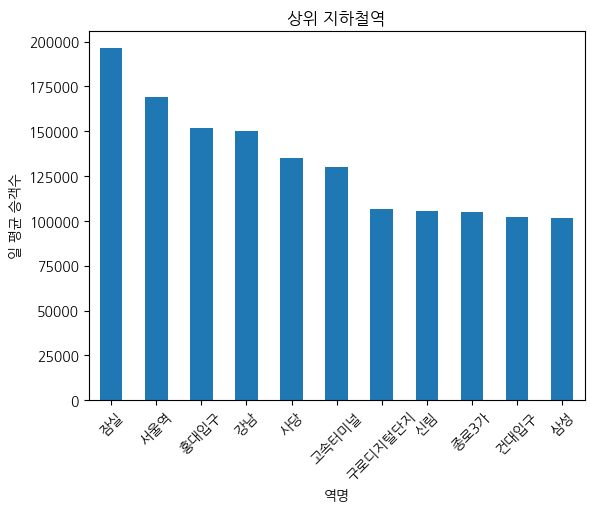

In [88]:
total_user['일 평균 승객수'].sort_values(ascending=False).head(11).plot(kind='bar', rot=45)
plt.title('상위 지하철역')
plt.ylabel('일 평균 승객수')

### 평일/주말 시간대별 평균 이용 승객수

In [89]:
weekday_df = df_user[df_user['구분'] == '평일']
weekend_df = df_user[df_user['구분'] == '주말+공휴일']


In [90]:
# 1.평일 승하차 데이터 분리
# 승차 평균 데이터
weekday_on_df = (weekday_df[weekday_df['승하차구분'] == '승차'].groupby(['역명'])[time_cols].sum() / n_weekday).round(2)

# 하차 일평균
weekday_off_df = (weekday_df[weekday_df['승하차구분'] == '하차'].groupby(['역명'])[time_cols].sum() / n_weekday).round(2)

In [91]:
# 2.휴일 승하차 데이터 분리

# 승차 평균 데이터
weekend_on_df = (weekend_df[weekend_df['승하차구분'] == '승차'].groupby(['역명'])[time_cols].sum() / n_holiday).round(2)

# 하차 평균 데이터
weekend_off_df = (weekend_df[weekend_df['승하차구분'] == '하차'].groupby(['역명'])[time_cols].sum() / n_holiday).round(2)

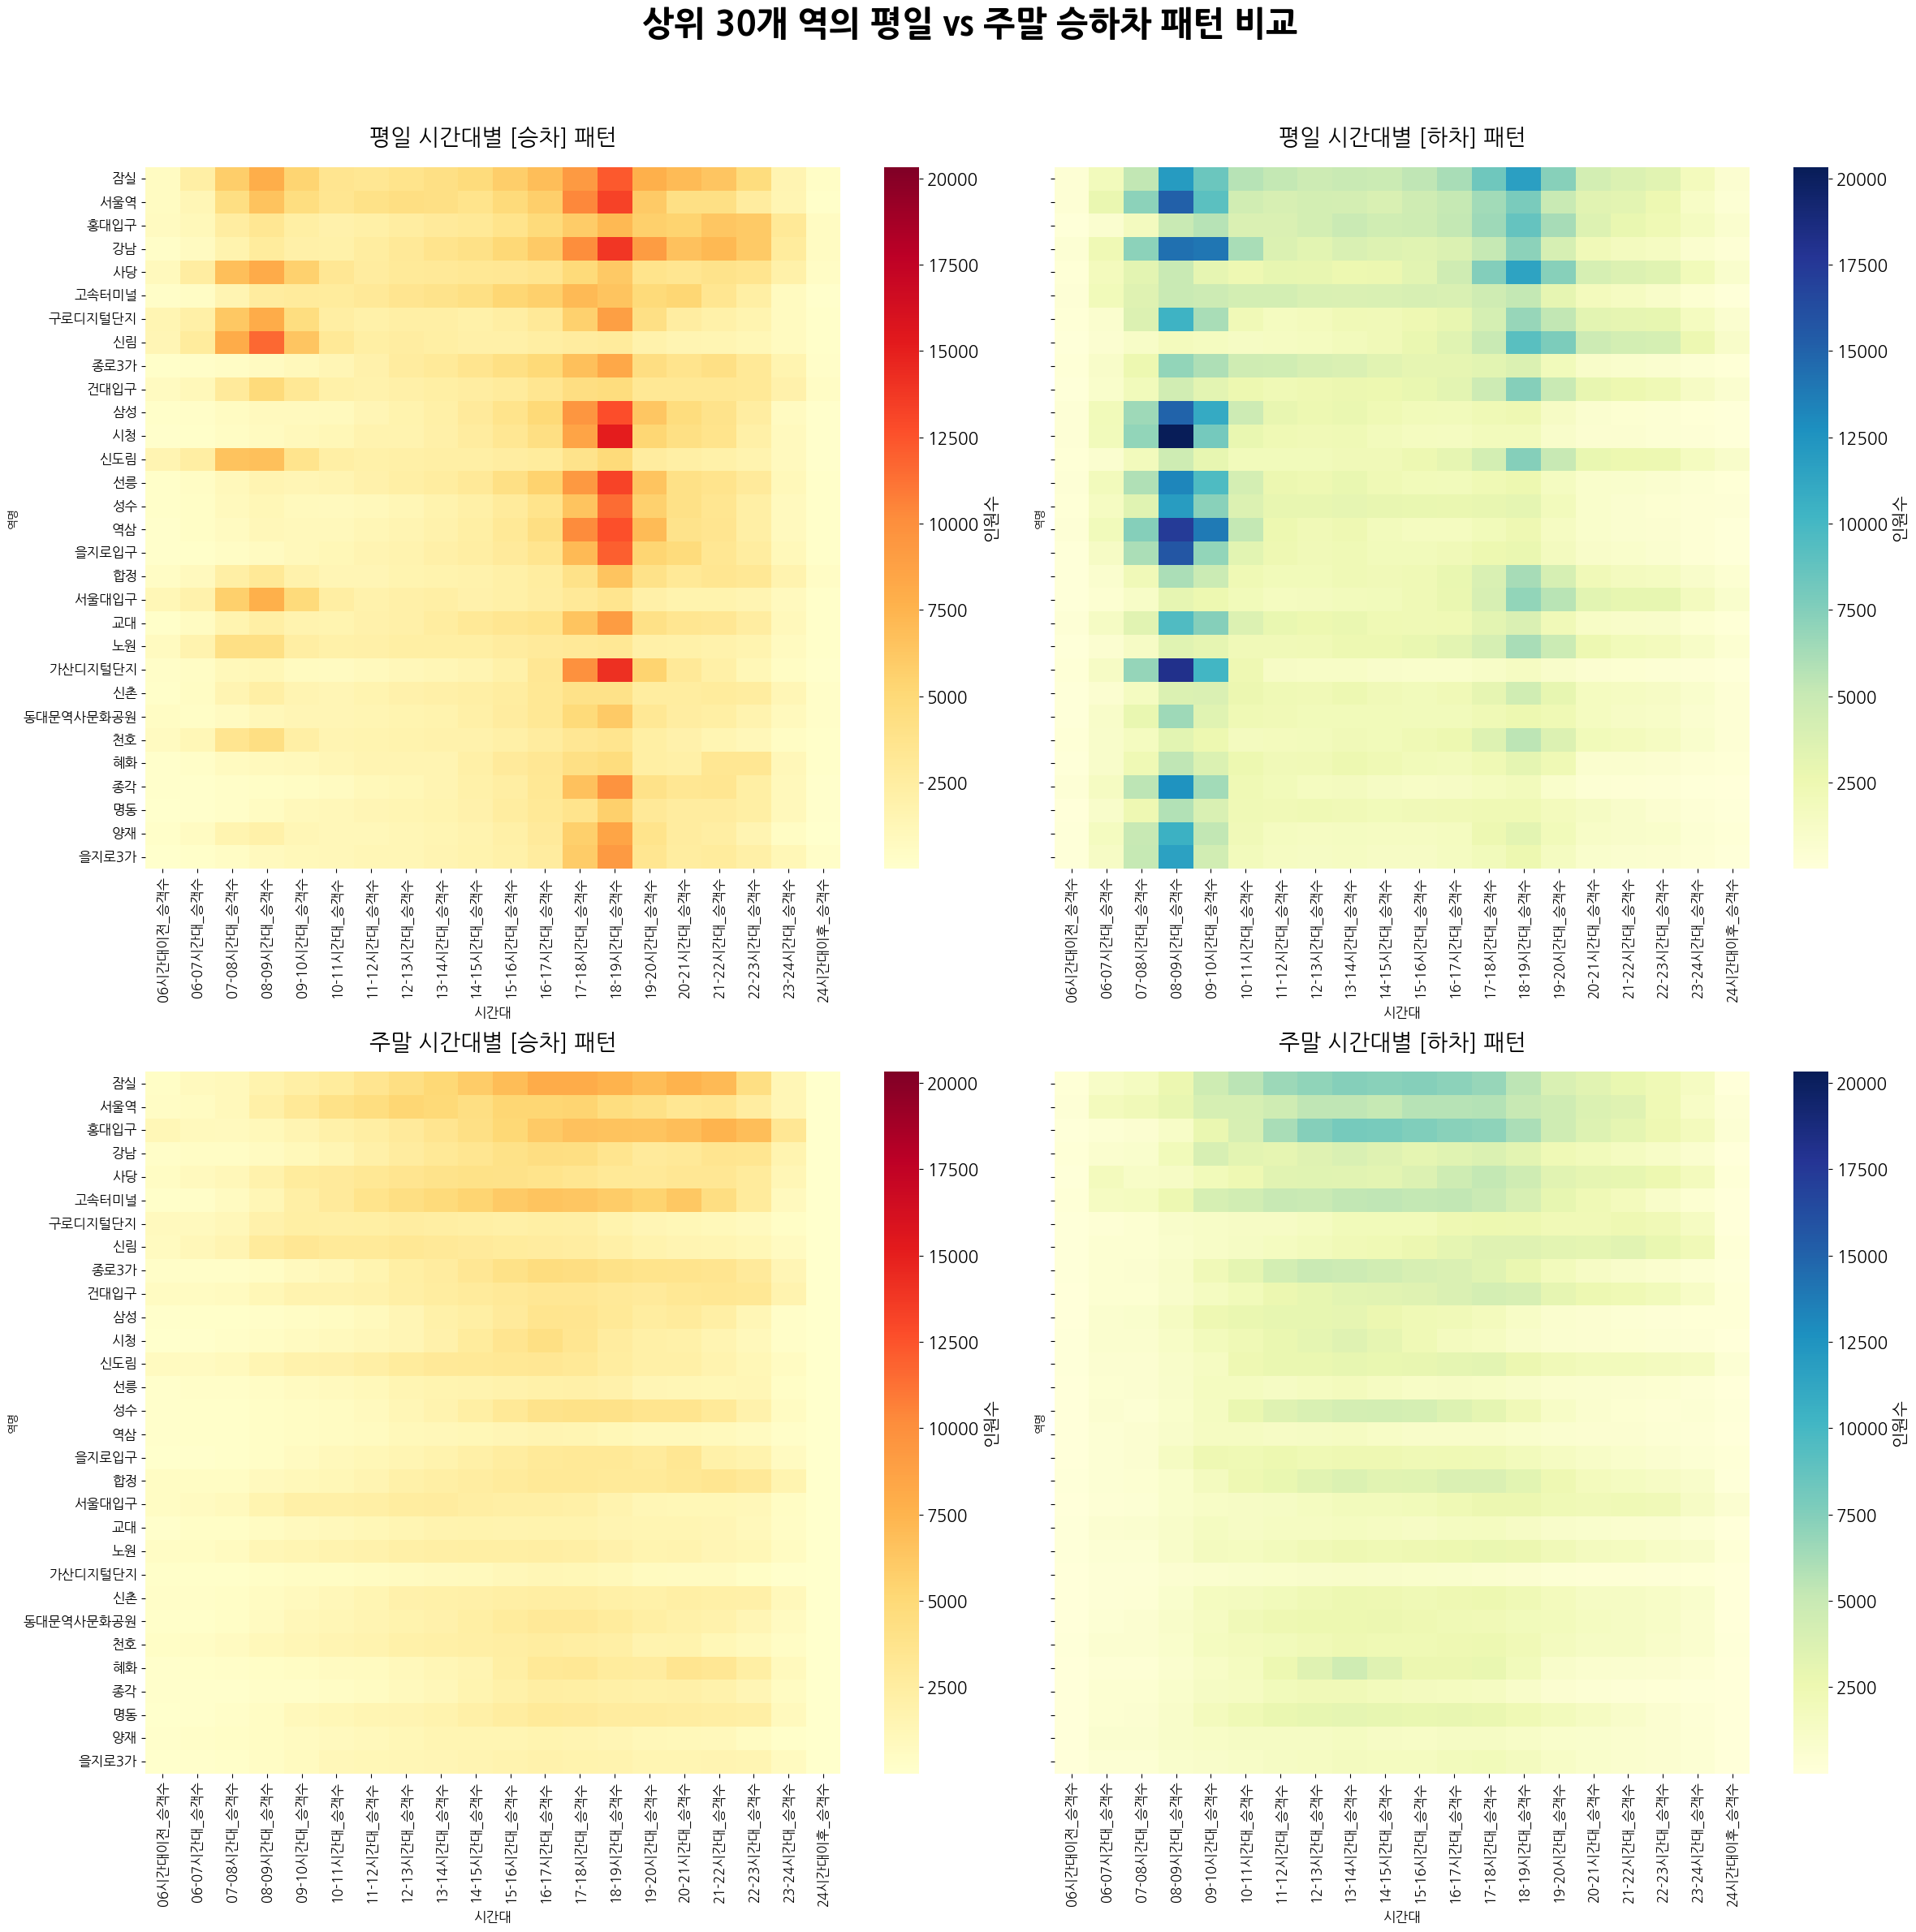

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. dff2에 있는 상위 20개 역 필터링
dff2 = (total_user['일 평균 승객수'].sort_values(ascending=False).head(30)).to_frame('일평균 승객수')
top_30_stations = dff2.index.tolist()
week_on = weekday_on_df.loc[top_30_stations]
week_off = weekday_off_df.loc[top_30_stations]
holi_on = weekend_on_df.loc[top_30_stations]
holi_off = weekend_off_df.loc[top_30_stations]

# 2. 모든 데이터의 최소/최대값을 찾아 전역 범위 설정
# 4개 데이터셋을 모두 합쳐 전체에서의 최소값과 최대값을 구함
all_values = pd.concat([week_on, week_off, holi_on, holi_off])
v_min = all_values.min().min()
v_max = all_values.max().max()

# 3. 시각화 설정 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(24, 25), sharey=True)
plt.subplots_adjust(wspace=0.15, hspace=0.3)

# 공통 설정: vmin, vmax를 동일하게 부여하여 컬러바 범위를 통일
heatmap_kwargs = {
    'vmin': v_min,
    'vmax': v_max,
    'annot': False,
    'fmt': '.0f'
}

# --- 평일 (1행) ---
sns.heatmap(week_on, ax=axes[0, 0], cmap='YlOrRd', **heatmap_kwargs, cbar_kws={'label': '인원수'})
axes[0, 0].set_title('평일 시간대별 [승차] 패턴', fontsize=20, pad=20)

sns.heatmap(week_off, ax=axes[0, 1], cmap='YlGnBu', **heatmap_kwargs, cbar_kws={'label': '인원수'})
axes[0, 1].set_title('평일 시간대별 [하차] 패턴', fontsize=20, pad=20)

# --- 휴일 (2행) ---
sns.heatmap(holi_on, ax=axes[1, 0], cmap='YlOrRd', **heatmap_kwargs, cbar_kws={'label': '인원수'})
axes[1, 0].set_title('주말 시간대별 [승차] 패턴', fontsize=20, pad=20)

sns.heatmap(holi_off, ax=axes[1, 1], cmap='YlGnBu', **heatmap_kwargs, cbar_kws={'label': '인원수'})
axes[1, 1].set_title('주말 시간대별 [하차] 패턴', fontsize=20, pad=20)

# 4. 레이아웃 세부 조정
for ax in axes.flat:
    # X축 라벨(시간대) 크기 조절
    ax.set_xlabel('시간대', fontsize=12)

    # Y축 라벨(역명) 크기 조절
    ax.tick_params(axis='y', labelsize=12)

    # X축 눈금(시간 숫자) 크기 조절
    ax.tick_params(axis='x', labelsize=12)

    # 컬러바(인원수) 글자 크기 조절
    cbar = ax.collections[0].colorbar
    if cbar:
        cbar.set_label('인원수', fontsize=15) # '인원수' 글자 크기
        cbar.ax.tick_params(labelsize=15) # 컬러바에 적힌 숫자 크기

# 전체 제목 크기 및 위치 재조정
plt.suptitle('상위 30개 역의 평일 vs 주말 승하차 패턴 비교', fontsize=30, y=0.98, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### 평일 시간대별 평균 이용객수만

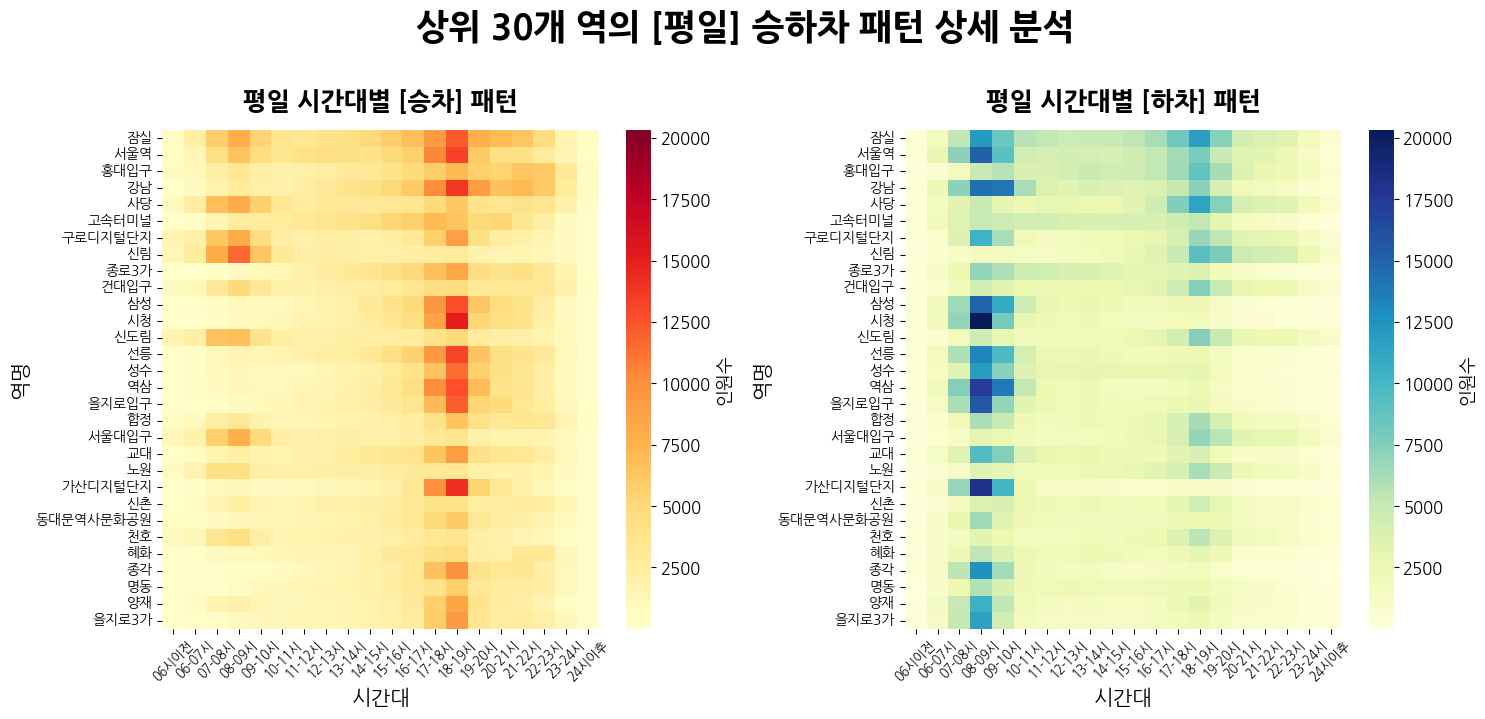

In [93]:
new_x_labels = ['06시이전', '06-07시', '07-08시', '08-09시', '09-10시',
                '10-11시', '11-12시', '12-13시', '13-14시', '14-15시',
                '15-16시', '16-17시', '17-18시', '18-19시', '19-20시',
                '20-21시', '21-22시', '22-23시', '23-24시', '24시이후']

# 평일 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplots_adjust(wspace=0.2)

# 평일 승차 히트맵
sns.heatmap(week_on, ax=axes[0], cmap='YlOrRd', **heatmap_kwargs, cbar_kws={'label': '인원수'})
axes[0].set_title('평일 시간대별 [승차] 패턴', fontsize=18, pad=15, fontweight='bold')

# 평일 하차 히트맵
sns.heatmap(week_off, ax=axes[1], cmap='YlGnBu', **heatmap_kwargs, cbar_kws={'label': '인원수'})
axes[1].set_title('평일 시간대별 [하차] 패턴', fontsize=18, pad=15, fontweight='bold')

for ax in axes:
    # Y축 설정
    ax.set_yticks(np.arange(len(top_30_stations)) + 0.5)
    ax.set_yticklabels(top_30_stations, fontsize=10, rotation=0)
    ax.set_ylabel('역명', fontsize=15)

    #X축 눈금 라벨 변경
    ax.set_xticks(np.arange(len(new_x_labels)) + 0.5) # 눈금 위치 설정
    ax.set_xticklabels(new_x_labels, fontsize=9, rotation=45) # 라벨 텍스트 및 각도 조절

    ax.set_xlabel('시간대', fontsize=15)

    # 컬러바 설정
    cbar = ax.collections[0].colorbar
    if cbar:
        cbar.set_label('인원수', fontsize=13)
        cbar.ax.tick_params(labelsize=12)

plt.suptitle('상위 30개 역의 [평일] 승하차 패턴 상세 분석', fontsize=25, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

### 출근 시간 하차 비중 구하기

In [94]:
morning_rush = ['07-08시간대_승객수', '08-09시간대_승객수', '09-10시간대_승객수']

weekday_off_total = (weekday_off_df.sum(axis=1)).to_frame('평일 하차 총 인원')

weekday_m_off_total = (weekday_off_df.groupby('역명')[morning_rush].sum().sum(axis=1)).to_frame('평일 출근 하차 인원 (7-10시)')

In [95]:
weekday_off_df.head()

,06시간대이전_승객수,06-07시간대_승객수,07-08시간대_승객수,08-09시간대_승객수,09-10시간대_승객수,10-11시간대_승객수,11-12시간대_승객수,12-13시간대_승객수,13-14시간대_승객수,14-15시간대_승객수,15-16시간대_승객수,16-17시간대_승객수,17-18시간대_승객수,18-19시간대_승객수,19-20시간대_승객수,20-21시간대_승객수,21-22시간대_승객수,22-23시간대_승객수,23-24시간대_승객수,24시간대이후_승객수
역명,,,,,,,,,,,,,,,,,,,,
가락시장,131.02,531.26,1207.42,3167.24,1306.51,848.08,821.29,831.77,883.40,912.97,1015.67,1132.92,1456.64,2040.67,1408.58,885.83,734.79,676.14,341.76,198.58
가산디지털단지,234.74,1320.83,6861.57,18104.65,10112.52,2393.16,1306.98,1217.62,1223.33,1018.82,929.06,936.55,1115.34,1495.42,1031.83,617.45,487.66,442.51,294.32,134.84
강남,475.74,2344.04,7156.56,14355.23,14040.06,6170.60,3742.60,3330.70,3927.24,3597.93,3441.39,3767.96,5145.55,7193.19,4117.41,2080.76,1716.94,1446.34,759.77,318.75
강남구청,70.79,631.30,1638.72,4769.89,4191.75,1624.67,851.02,744.47,788.67,661.55,623.23,626.38,731.05,856.63,525.97,343.09,254.29,208.27,136.12,82.50
강동,56.67,432.34,1236.73,2479.66,1271.46,703.53,638.96,665.47,847.05,807.16,917.06,1063.64,1424.12,2440.27,1740.80,1098.75,1006.11,883.89,539.97,256.67


In [96]:
weekday_m_off_proportion = (weekday_m_off_total['평일 출근 하차 인원 (7-10시)'] / weekday_off_total['평일 하차 총 인원']).to_frame('평일출근하차비중')

In [97]:
weekday_m_off_proportion.describe()

,평일출근하차비중
count,240.000000
mean,0.234994
std,0.130414
min,0.065914
25%,0.131333
50%,0.200679
75%,0.303166
max,0.684073


In [98]:
# 변동계수 CV(&) 구하기
(weekday_m_off_proportion['평일출근하차비중'].std()/weekday_m_off_proportion['평일출근하차비중'].mean())*100

np.float64(55.496776563202154)

In [99]:
weekday_m_off_proportion = (weekday_m_off_total['평일 출근 하차 인원 (7-10시)'] / weekday_off_total['평일 하차 총 인원']).to_frame('평일출근하차비중')

In [100]:
weekday_m_off_proportion.describe()

,평일출근하차비중
count,240.000000
mean,0.234994
std,0.130414
min,0.065914
25%,0.131333
50%,0.200679
75%,0.303166
max,0.684073


In [101]:
from scipy import stats
stat, p_value = stats.shapiro(weekday_m_off_proportion)
p_value

np.float64(2.4813034566655118e-12)

Shapiro-Wilk 통계량: 0.8881
P-value: 2.4813e-12


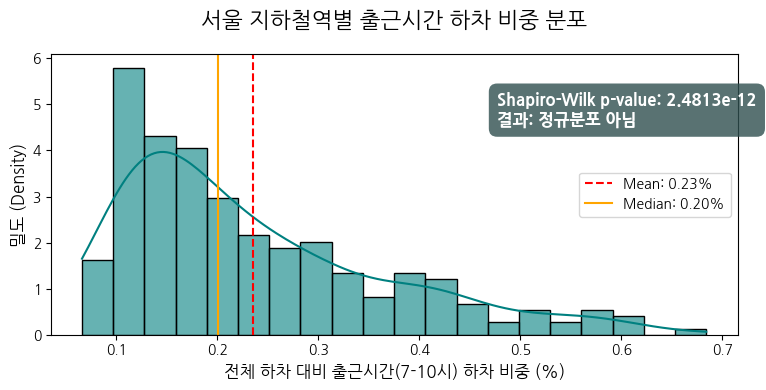

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. 정규성 검정 수행 (Shapiro-Wilk Test)
data = weekday_m_off_proportion['평일출근하차비중']
shapiro_test = stats.shapiro(data)

print(f"Shapiro-Wilk 통계량: {shapiro_test.statistic:.4f}")
print(f"P-value: {shapiro_test.pvalue:.4e}")

# 2. 시각화 (Histogram + KDE)
plt.figure(figsize=(8, 4))

# 히스토그램과 밀도 그래프 그리기
sns.histplot(data, kde=True, color='teal', bins=20, stat="density", alpha=0.6)

# 평균과 중앙값 표시 - 데이터의 편향성을 시각적으로 증명
plt.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.2f}%')
plt.axvline(data.median(), color='orange', linestyle='-', label=f'Median: {data.median():.2f}%')

# 그래프 제목 및 라벨 설정
plt.title('서울 지하철역별 출근시간 하차 비중 분포', fontsize=16, pad=20)
plt.xlabel('전체 하차 대비 출근시간(7-10시) 하차 비중 (%)', fontsize=12)
plt.ylabel('밀도 (Density)', fontsize=12)
plt.legend()

# 주석
is_normal = "정규분포 아님" if shapiro_test.pvalue < 0.05 else "정규분포 가능성"
plt.annotate(f'Shapiro-Wilk p-value: {shapiro_test.pvalue:.4e}\n결과: {is_normal}',
             xy=(0.65, 0.75), xycoords='axes fraction',
             fontsize=12, color='white', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.5", fc="darkslategray", ec="none", alpha=0.8))

plt.tight_layout()
plt.show()

#### 연령대 비율 구하기

In [103]:
df_user_total = df_user.groupby(['역명', '승객유형'])[time_cols].sum().sum(axis=1)

In [104]:
category_map = {
    # 일반 그룹
    '일반': '일반', '영어 일반': '일반', '일어 일반': '일반', '중국어 일반': '일반', '직원': '일반',
    # 미성년자 그룹
    '어린이': '미성년자', '중고생': '미성년자', '청소년': '미성년자',
    '영어 어린이': '미성년자', '일어 어린이': '미성년자', '중국어 어린이': '미성년자',
    # 우대 그룹
    '우대권': '우대'
}

df_user_total = df_user_total.replace(category_map)

In [105]:
df_user_total = df_user_total.reset_index()
df_user_total.columns = ['역명', '승객유형', '인원수']

category_map = {
    '일반': '일반', '영어 일반': '일반', '일어 일반': '일반', '중국어 일반': '일반', '직원': '일반',
    '어린이': '미성년자', '중고생': '미성년자', '청소년': '미성년자',
    '영어 어린이': '미성년자', '일어 어린이': '미성년자', '중국어 어린이': '미성년자',
    '우대권': '우대'
}

df_user_total['그룹'] = df_user_total['승객유형'].replace(category_map)

df_grouped = df_user_total.groupby(['역명', '그룹'])['인원수'].sum().reset_index()

df_user_pivot = df_grouped.pivot(index='역명', columns='그룹', values='인원수').fillna(0)

df_user_pivot.head()

그룹,미성년자,우대,일반
역명,,,
가락시장,126840,1803942,4254588
가산디지털단지,91545,1181100,12414826
강남,781976,1821976,24547063
강남구청,92096,656515,4891375
강동,131293,1412919,4906428


In [106]:
day_count = 181

df_user_daily_avg = df_user_pivot / day_count

df_user_daily_avg = df_user_daily_avg.round(1)

In [107]:
# 비율차이
# 20개만 카이제곱 독립성 검정
dff3=df_user_daily_avg.head(20)

# 카이제곱 검정 수행
from scipy.stats import chi2_contingency
import pandas as pd

# chi2: 통계량 / p: 유의확률 / dof: 자유도 / expected: 기대빈도
chi2, p, dof, expected = chi2_contingency(dff3)
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"P-value: {p:.4e}")

# 3. 결과 해석
if p < 0.05:
    print("결과: 역과 승객 유형 사이에는 통계적으로 유의미한 상관관계가 있다.")
    print("즉, 역마다 미성년자/일반/우대 비율이 다른 것은 우연이 아니며, 역의 고유한 특성이다.")
else:
    print("결과: 역마다 승객 유형 비율의 차이가 통계적으로 유의미하지 않습니다.")

카이제곱 통계량: 39012.5879
P-value: 0.0000e+00
결과: 역과 승객 유형 사이에는 통계적으로 유의미한 상관관계가 있다.
즉, 역마다 미성년자/일반/우대 비율이 다른 것은 우연이 아니며, 역의 고유한 특성이다.


In [108]:
# 비율 확인
df_proportion = df_user_pivot.div(df_user_pivot.sum(axis=1), axis=0)

df_proportion_pct = (df_proportion * 100).round(2)

df_proportion_pct.head()

그룹,미성년자,우대,일반
역명,,,
가락시장,2.05,29.16,68.78
가산디지털단지,0.67,8.63,90.70
강남,2.88,6.71,90.41
강남구청,1.63,11.64,86.73
강동,2.04,21.90,76.06


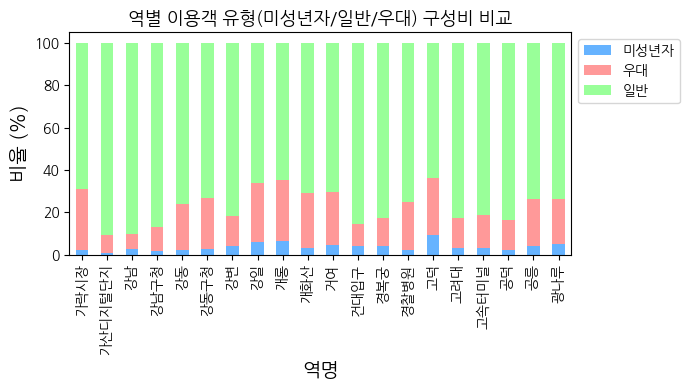

In [109]:
plt.figure(figsize=(7, 4))
df_proportion_pct.head(20).plot(kind='bar', stacked=True,
                                 color=['#66b3ff', '#ff9999', '#99ff99'],
                                 ax=plt.gca())

plt.title('역별 이용객 유형(미성년자/일반/우대) 구성비 비교', fontsize=13)
plt.ylabel('비율 (%)', fontsize=14)
plt.xlabel('역명', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()